## 1. Data analysis

In [1]:
import pandas as pd

from matplotlib import pyplot as plt
import pylab as plot


pd.options.display.max_columns = 100
params = {
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

In [2]:
import argparse
args = argparse.Namespace()
args.raw_train = pd.read_csv("../data/train.csv")
args.raw_test = pd.read_csv("../data/test.csv")
args.train_border_index = 891
args.val_border_index = 265
args.splits = 5

In [3]:
print(args.raw_train.describe())
print(args.raw_train.shape)
args.raw_train.head()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(args.raw_test.describe())
print(args.raw_test.shape)
args.raw_test.head()

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200
(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Data spread

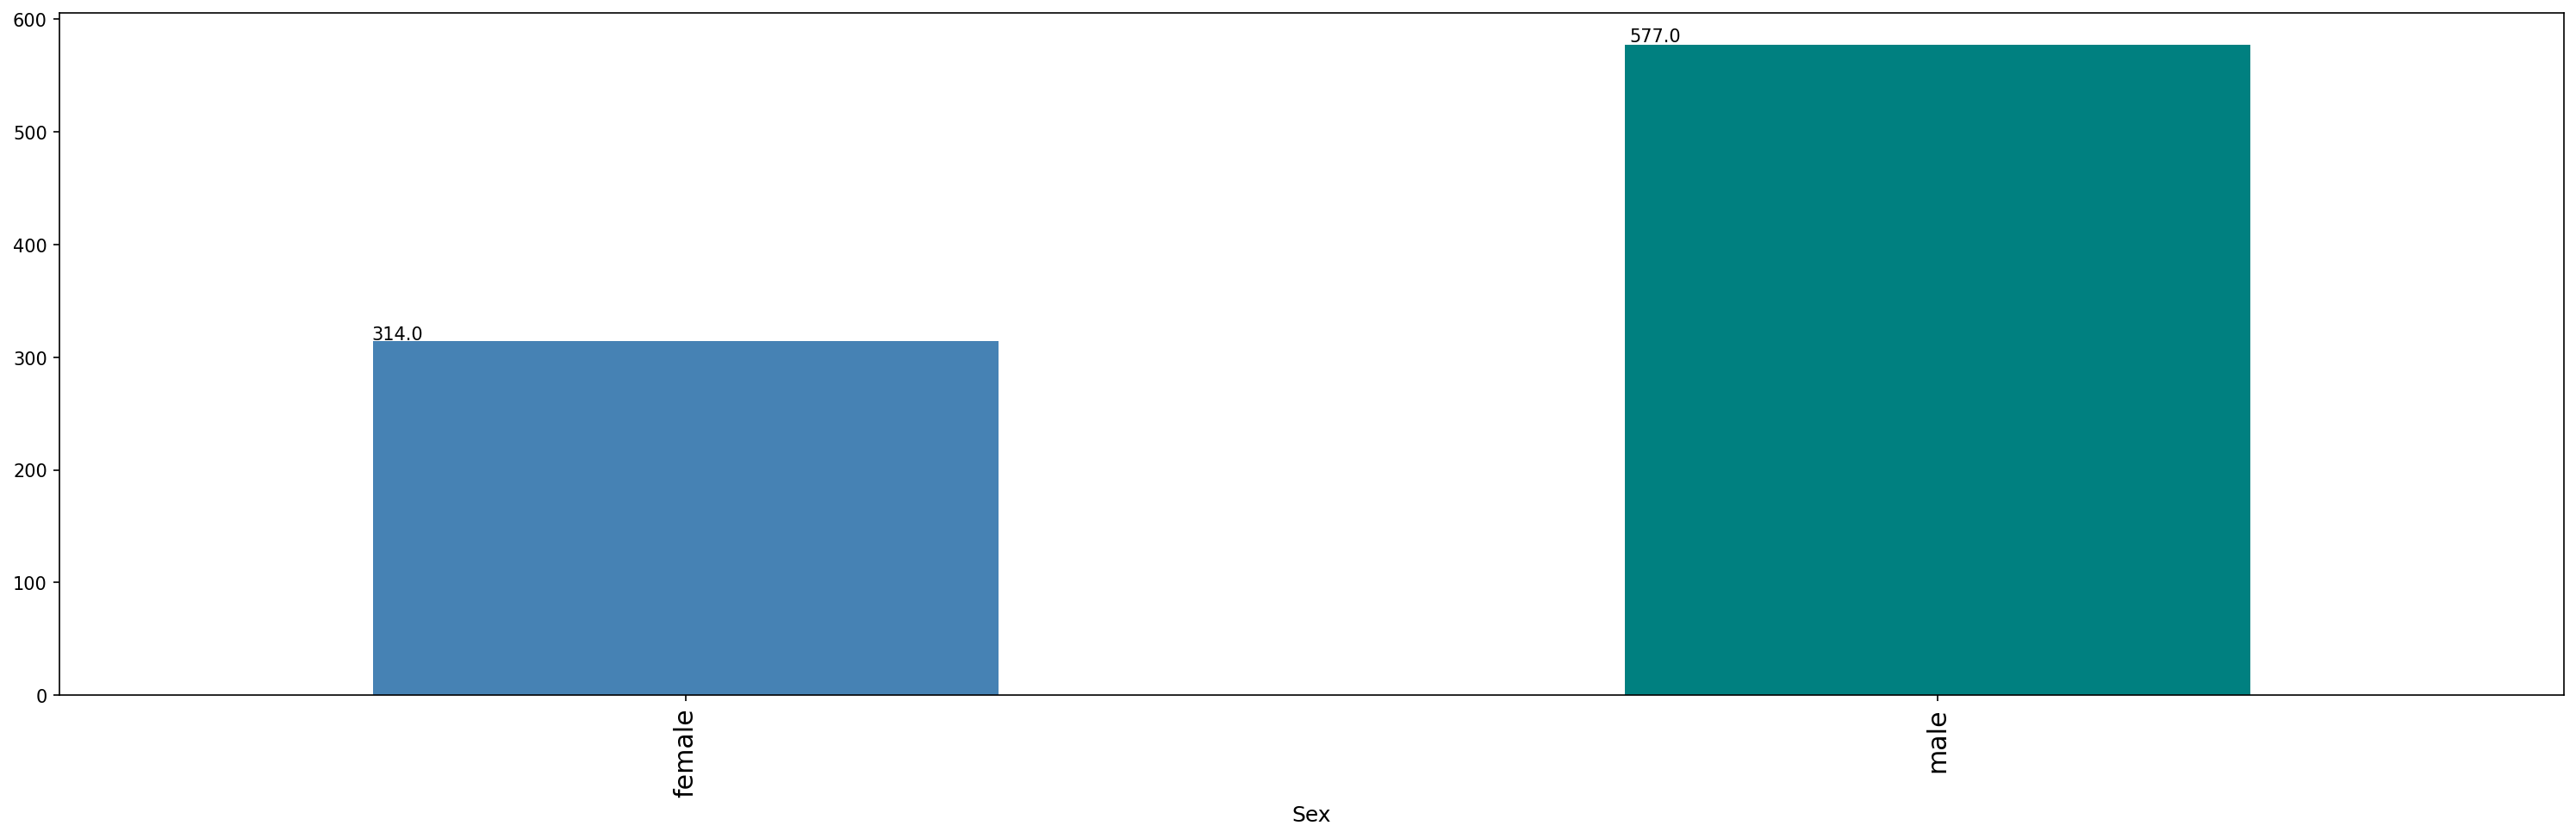

In [5]:
ax = args.raw_train.groupby(['Sex']).agg('count')['PassengerId'].plot(kind='bar', figsize=(25, 7),
                                                                   stacked=True, color=['SteelBlue', 'Teal'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

<AxesSubplot:ylabel='Frequency'>

<Figure size 3750x1050 with 0 Axes>

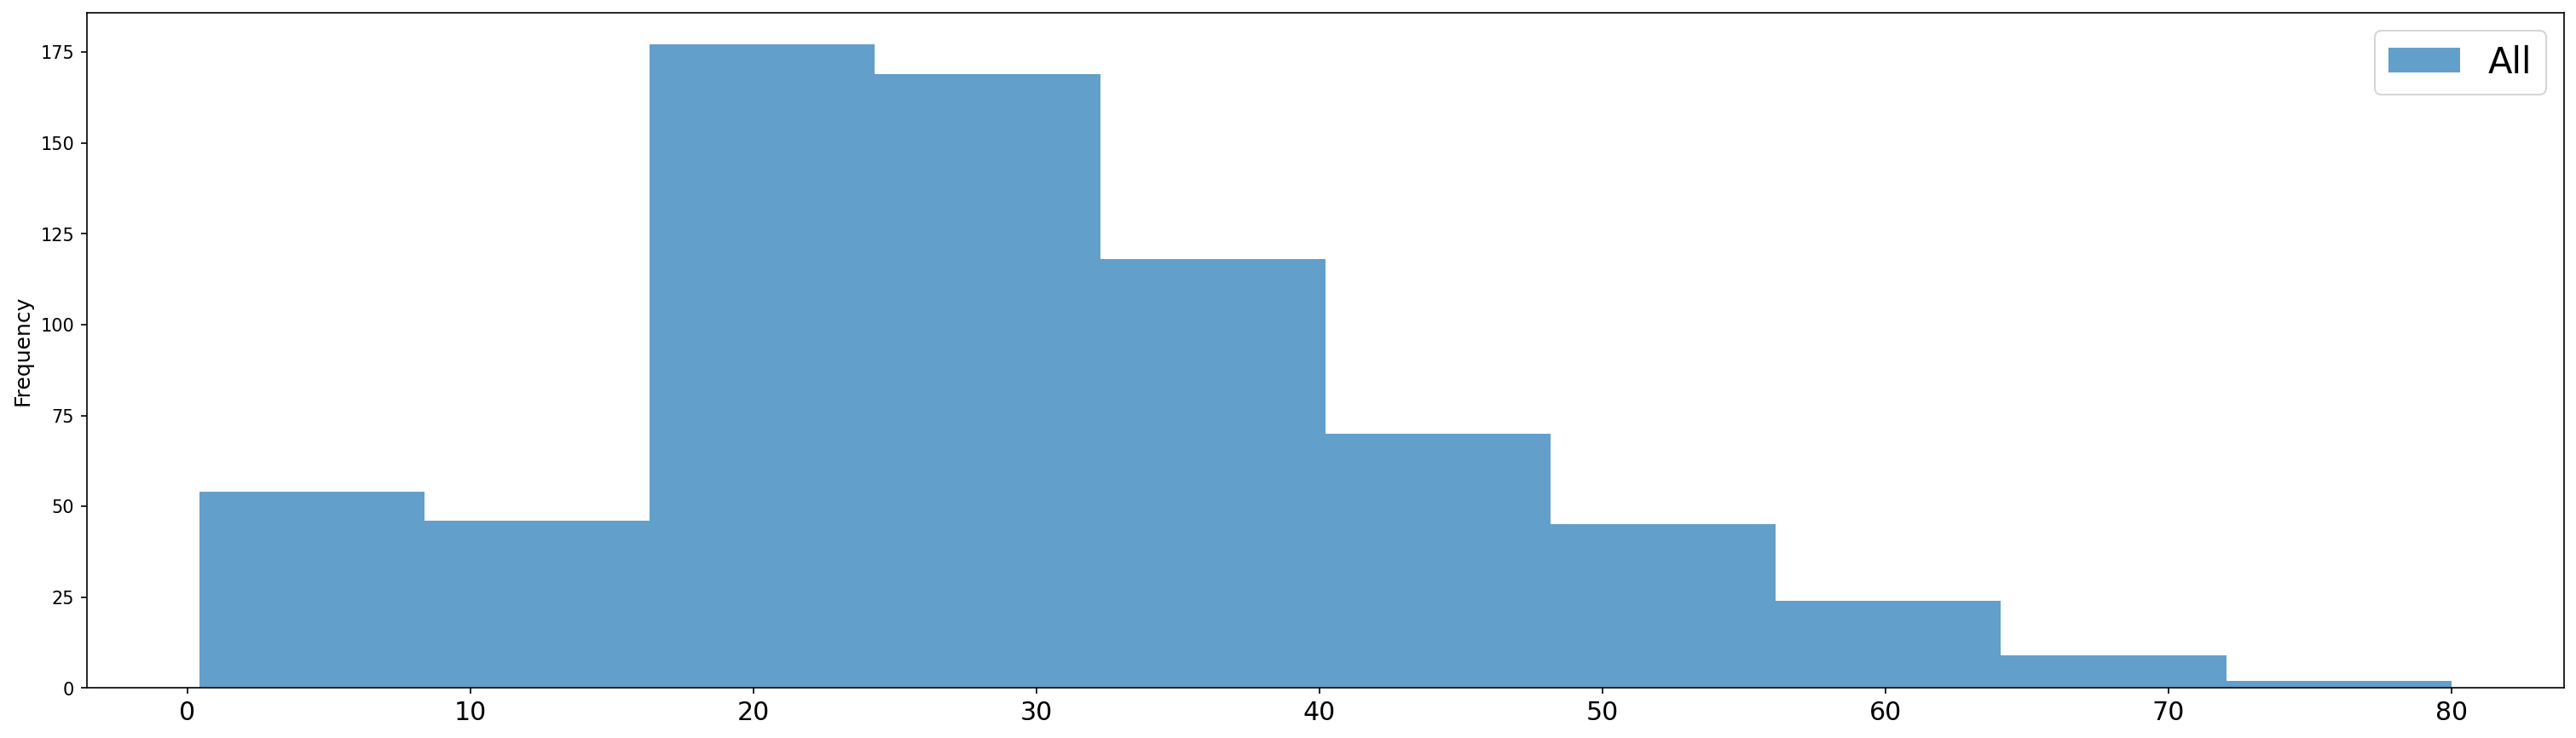

In [6]:
hist_data = pd.DataFrame({'All': args.raw_train['Age']}, columns=['All'])
plt.figure();
hist_data.plot.hist(alpha=0.7)

### Survived and sex

<AxesSubplot:xlabel='Sex'>

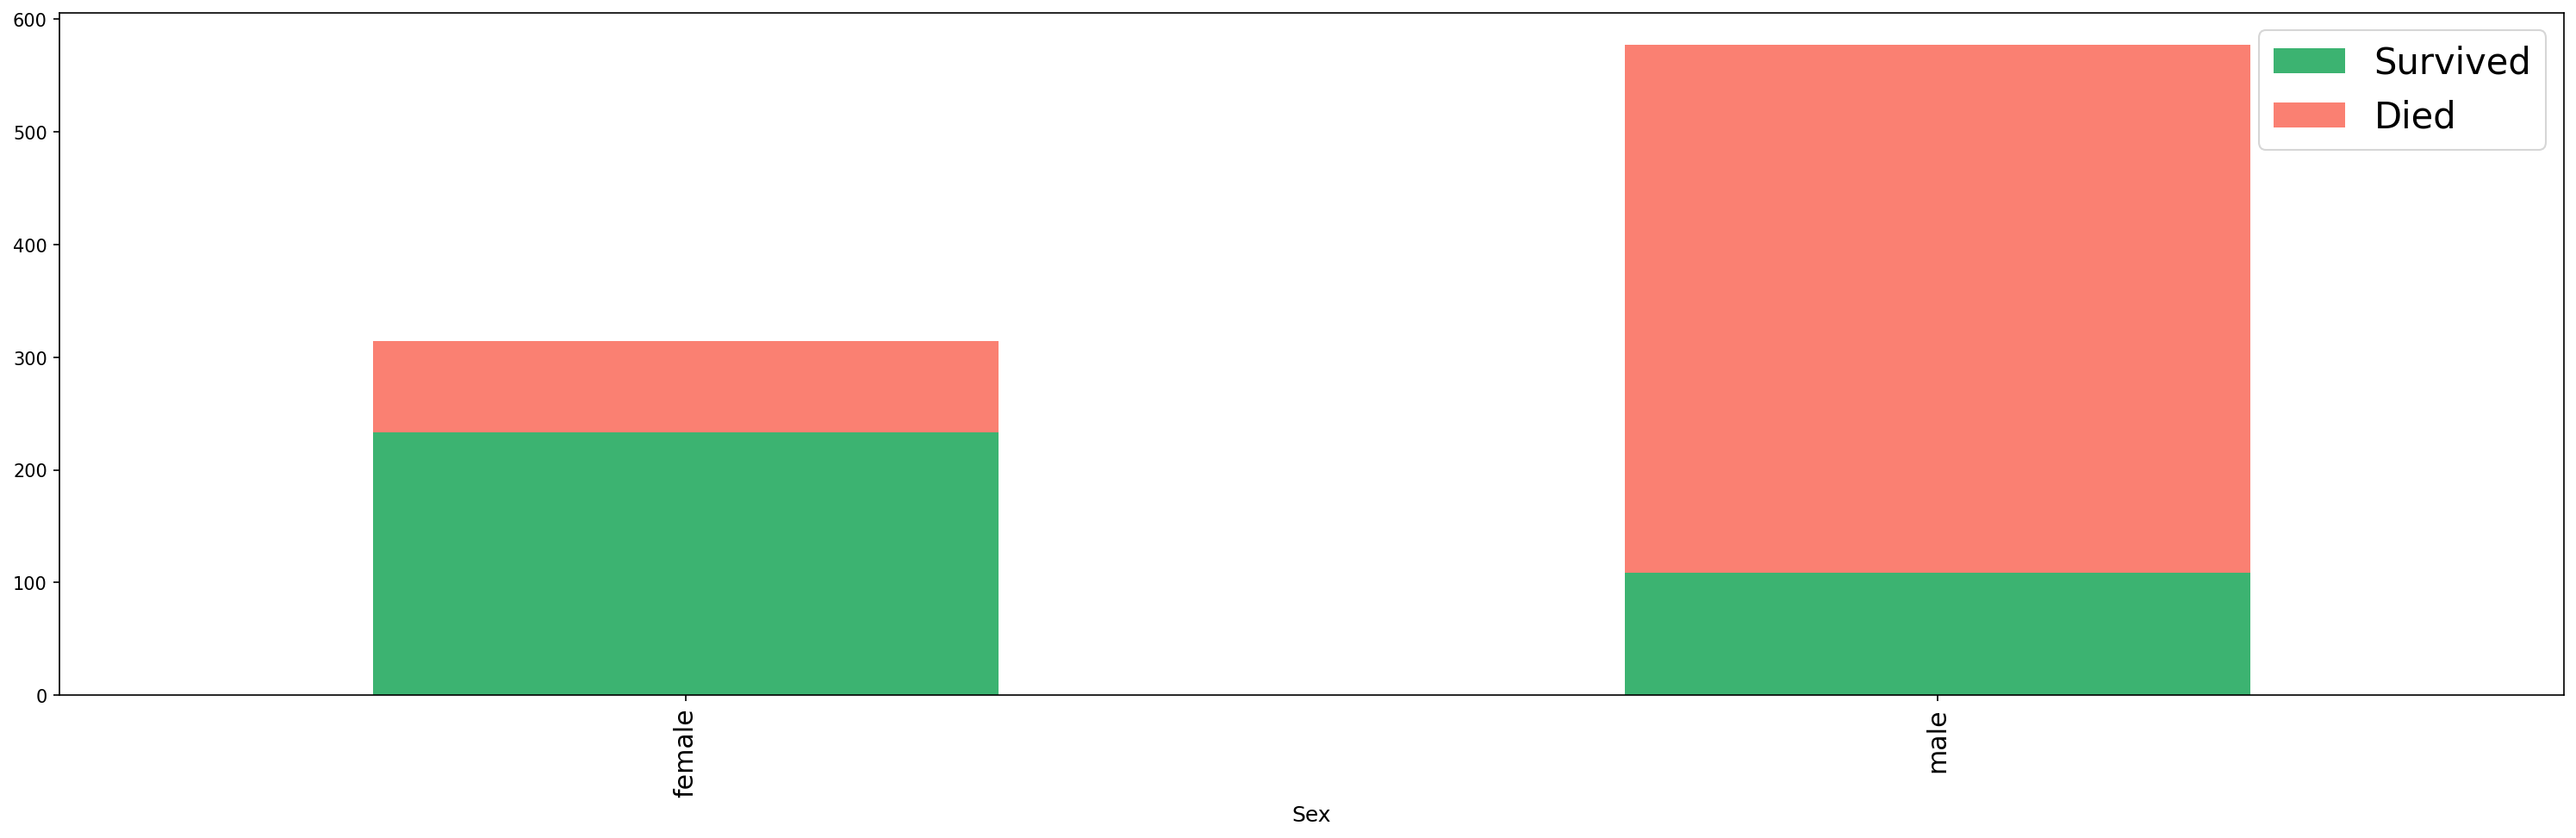

In [7]:
args.raw_train['Died'] = 1 - args.raw_train['Survived']
args.raw_train.groupby(['Sex']).agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7),
                                                                   stacked=True, color=['MediumSeaGreen', 'Salmon'])

### Survived and age

<AxesSubplot:ylabel='Density'>

<Figure size 3750x1050 with 0 Axes>

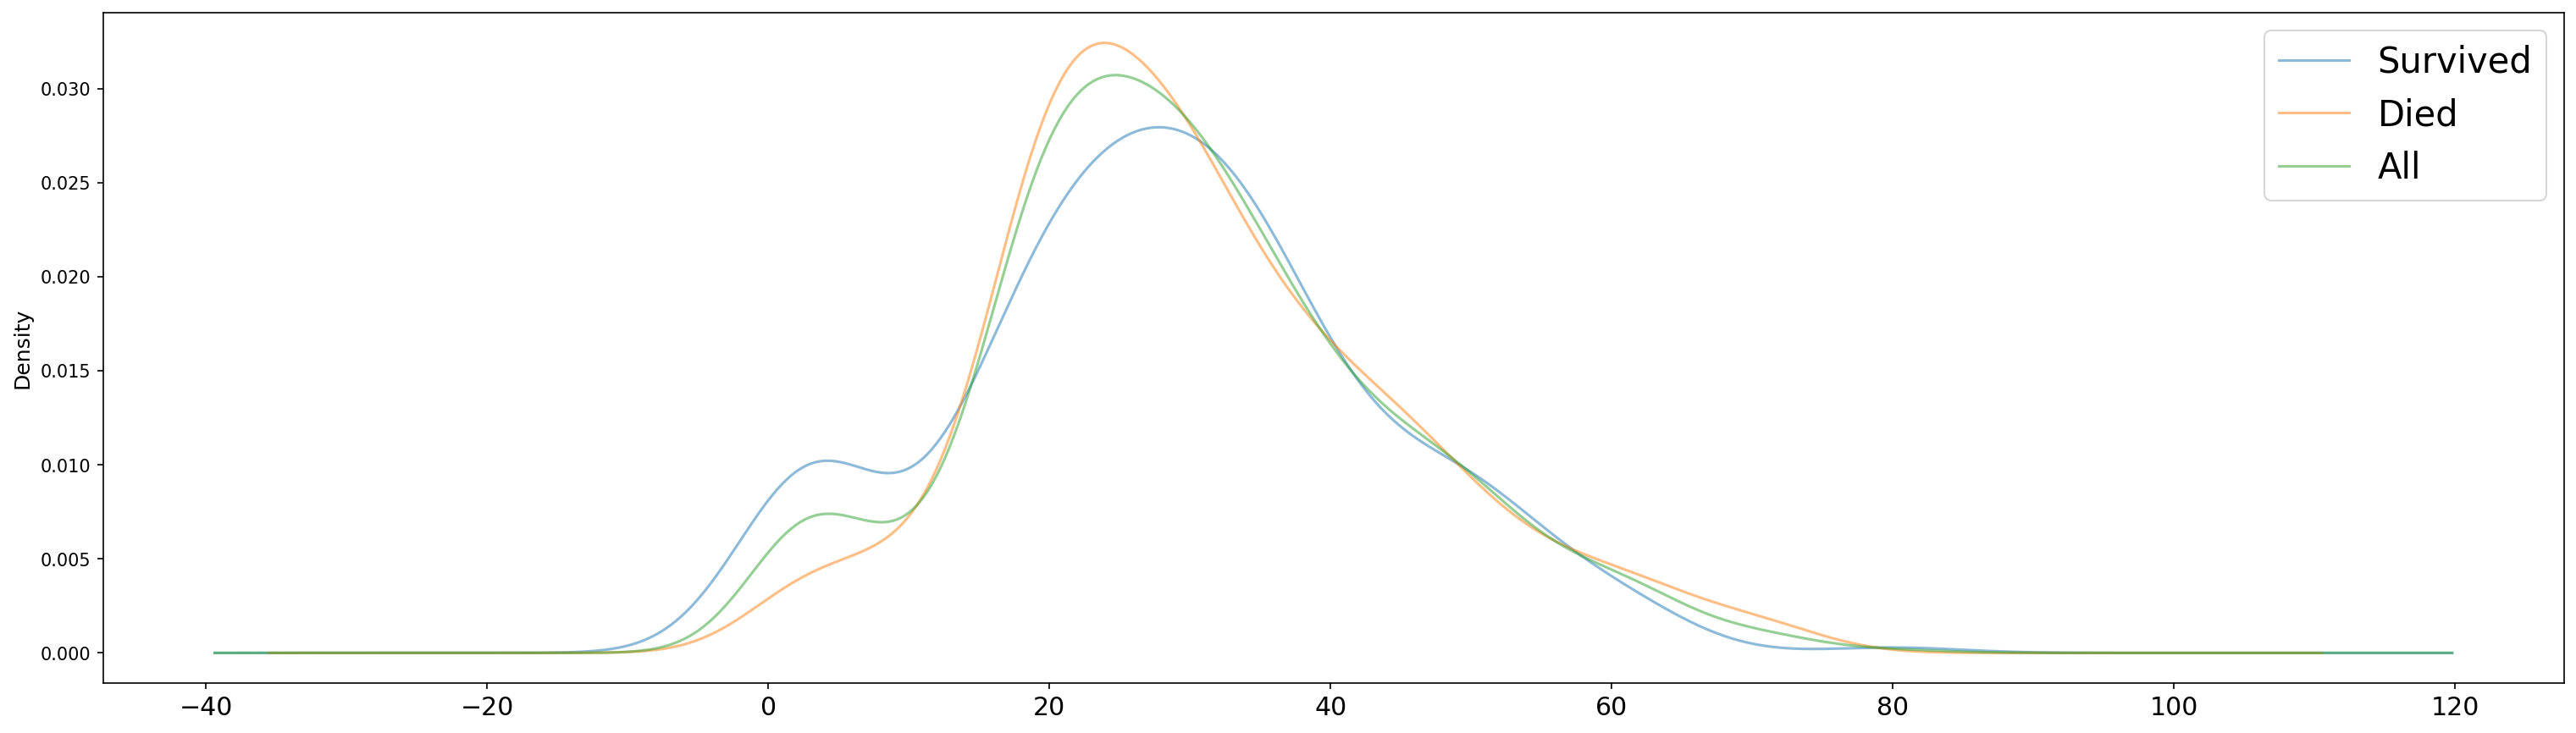

In [8]:
hist_data = pd.DataFrame({'Survived': args.raw_train['Age'][args.raw_train.Survived==1], 
                          'Died': args.raw_train['Age'][args.raw_train.Survived==0],
                          'All': args.raw_train['Age']}, columns=['Survived', 'Died', 'All'])
plt.figure();

hist_data.plot.kde(alpha=0.5)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

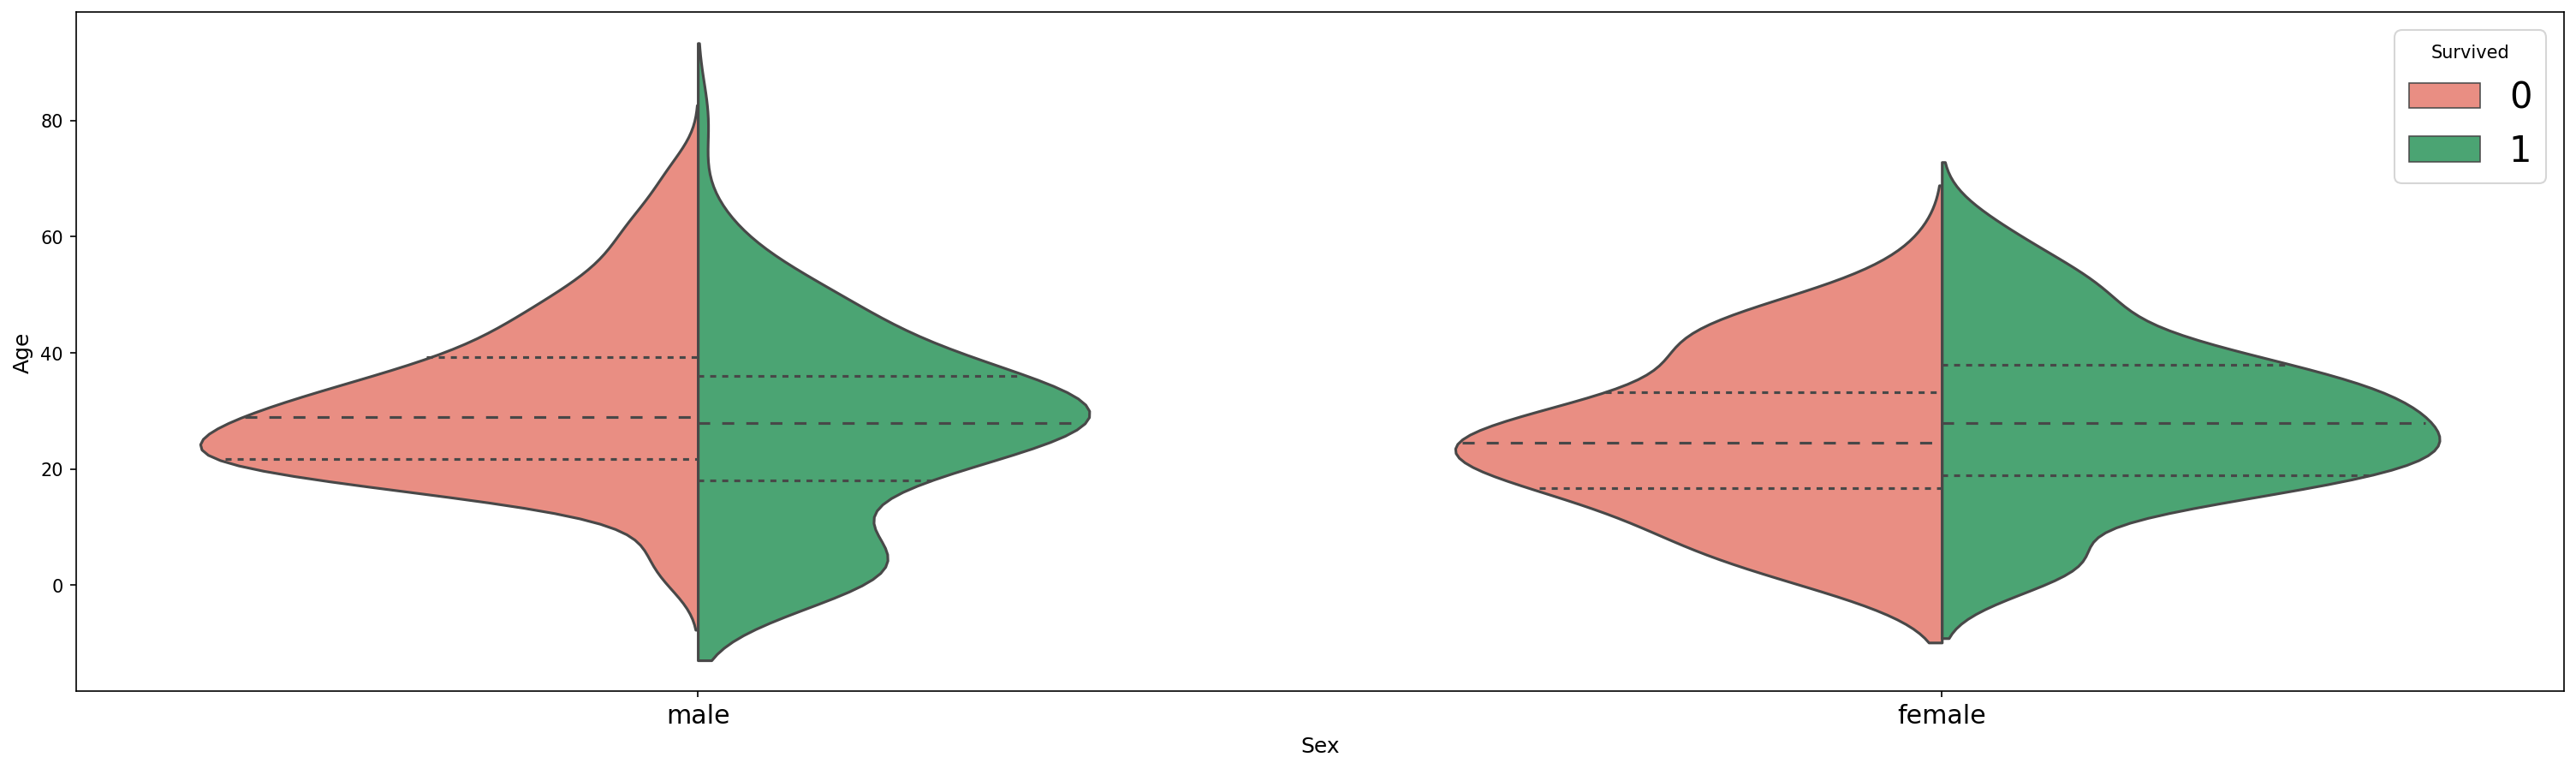

In [9]:
import seaborn as sns

sns.violinplot(x="Sex", y="Age", hue="Survived",
               split=True, inner="quart",
               palette={0: 'Salmon', 1: 'MediumSeaGreen'},
               data=args.raw_train)

### Survived and Pclass

<AxesSubplot:xlabel='Pclass'>

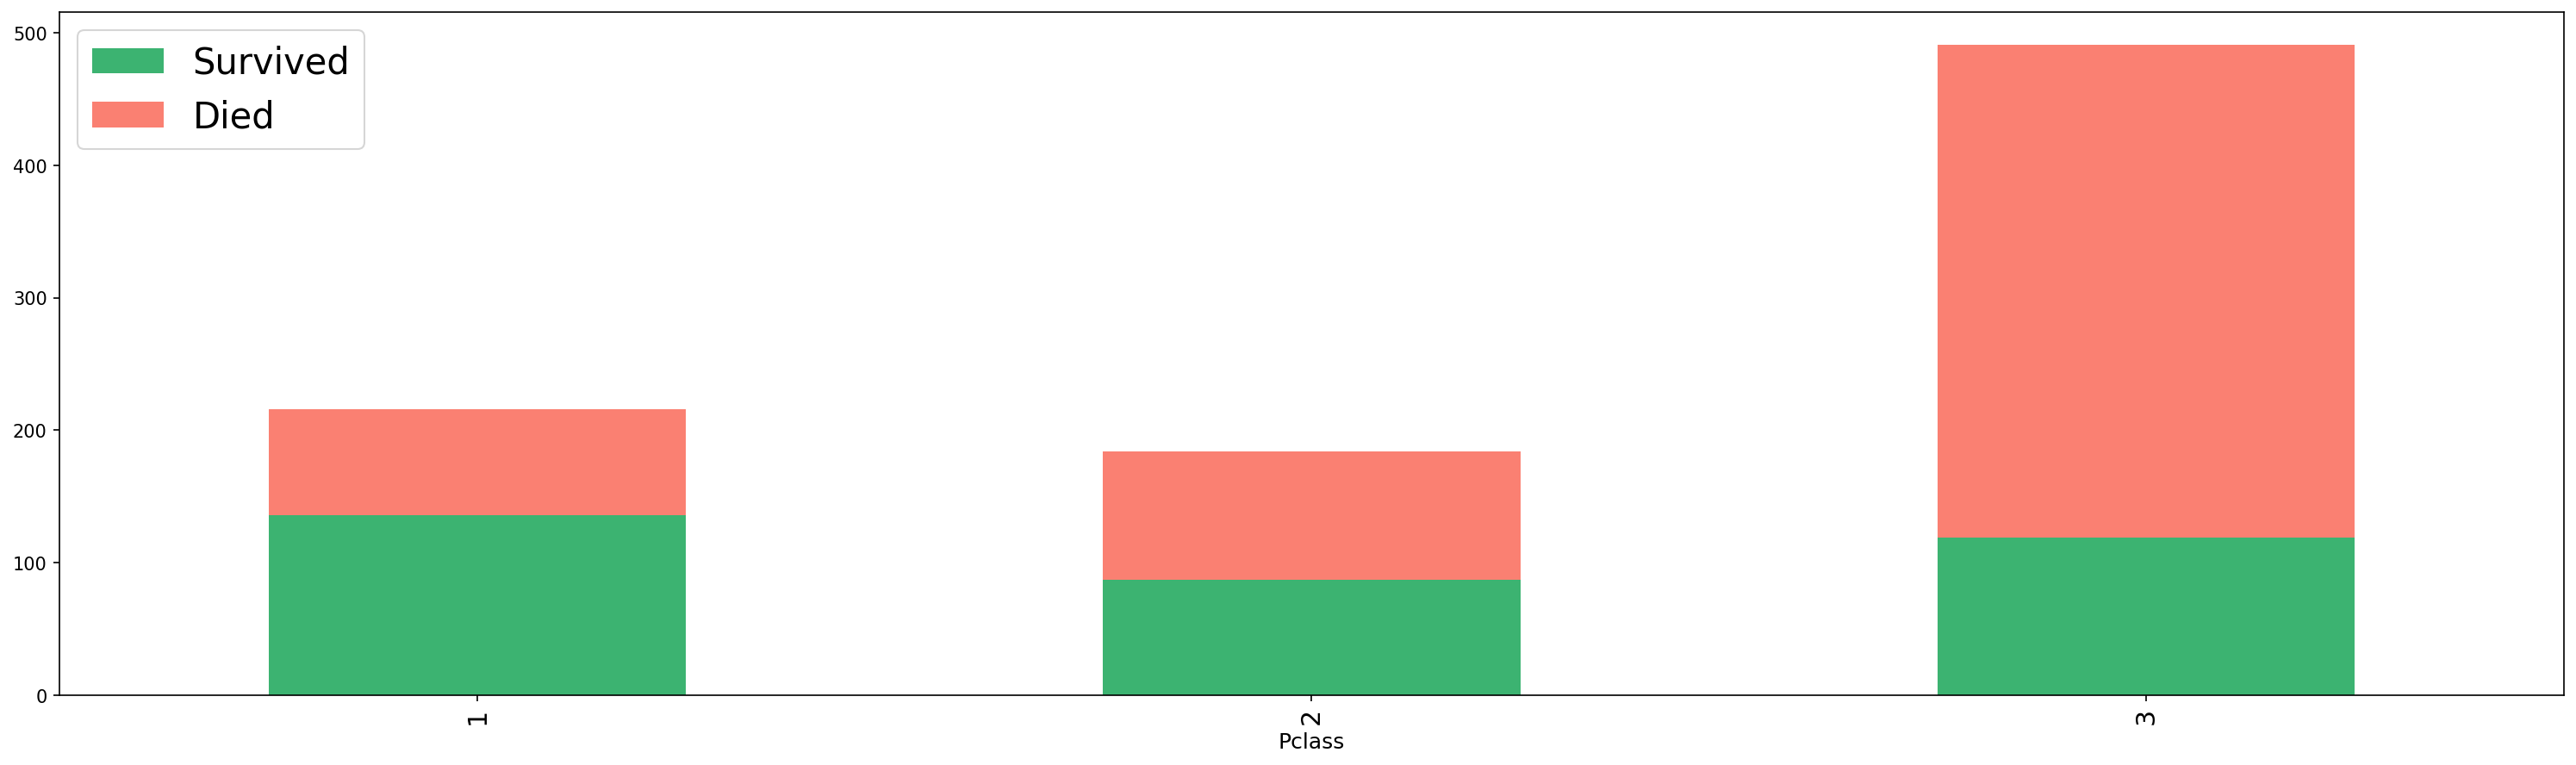

In [10]:
args.raw_train.groupby(['Pclass']).agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7),
                                                                   stacked=True, color=['MediumSeaGreen', 'Salmon'])

### Survived and the number of siblings

<AxesSubplot:xlabel='SibSp'>

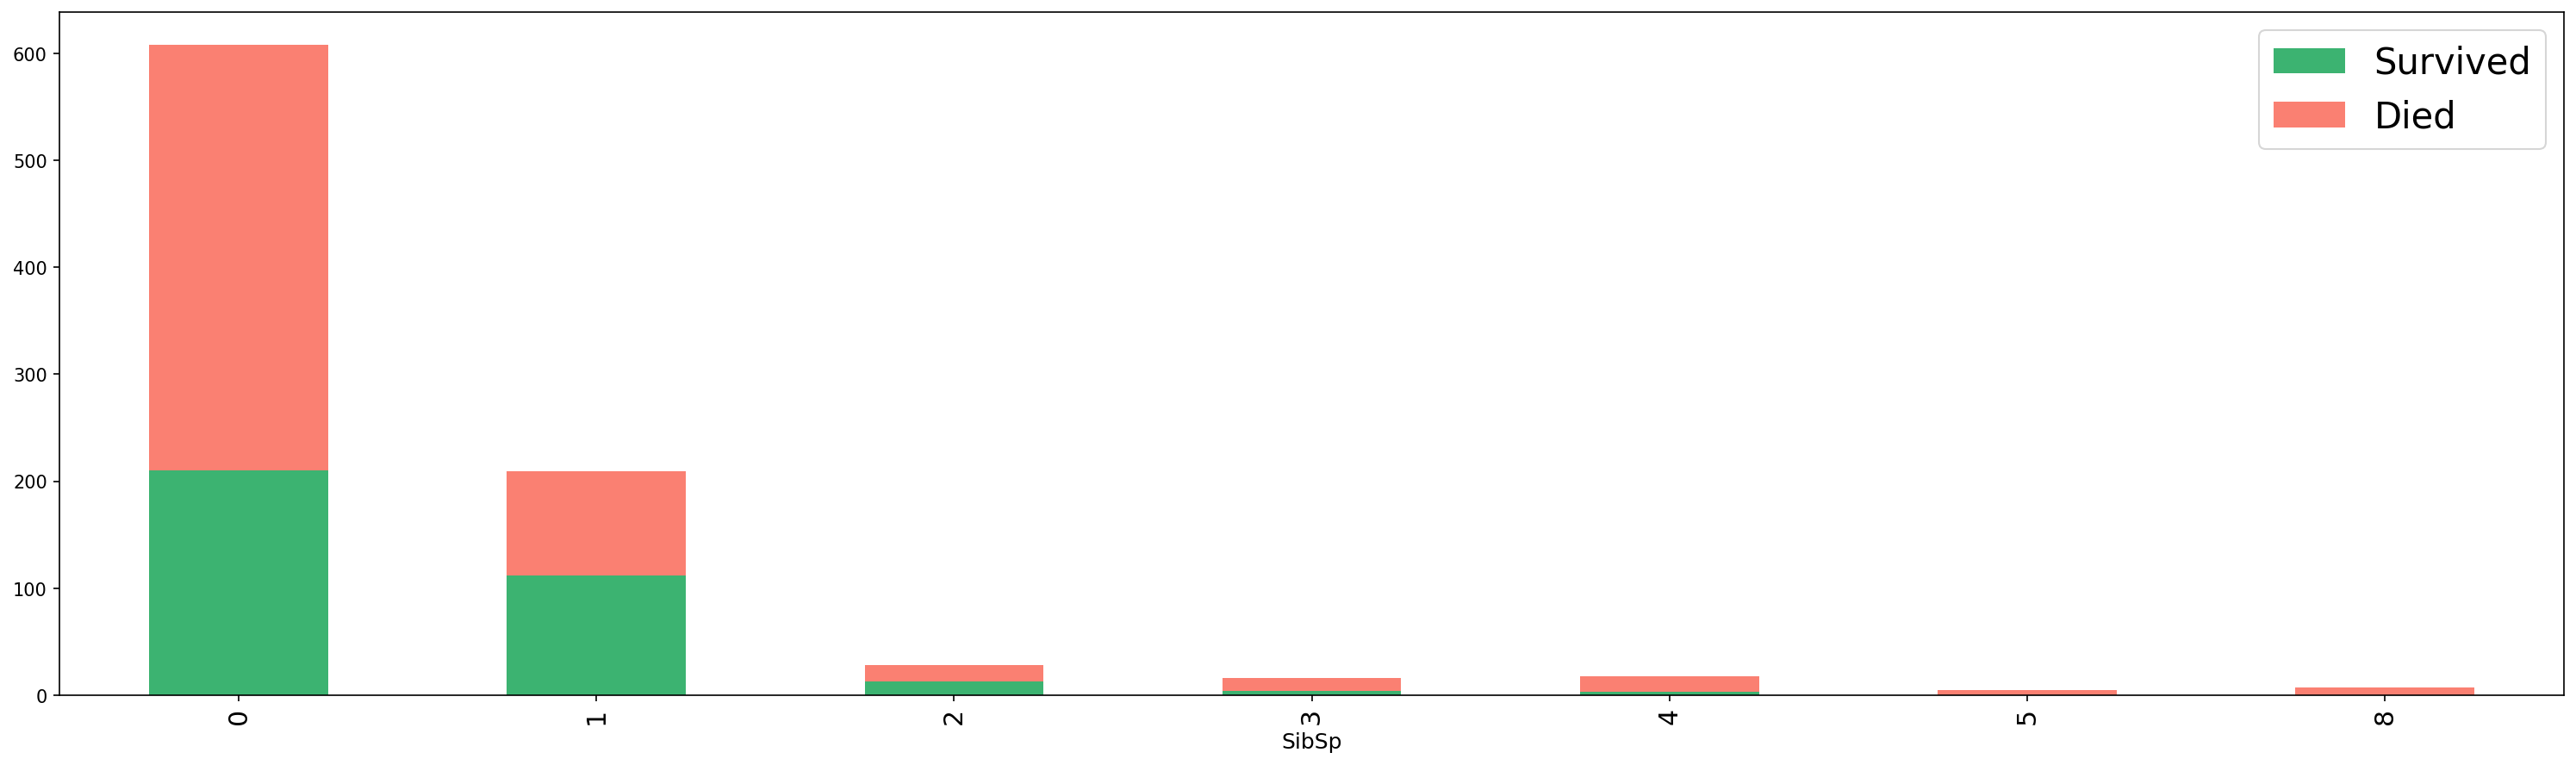

In [11]:
args.raw_train.groupby(['SibSp']).agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7),
                                                                   stacked=True, color=['MediumSeaGreen', 'Salmon'])

### Survived and the number of parents and children

<AxesSubplot:xlabel='Parch'>

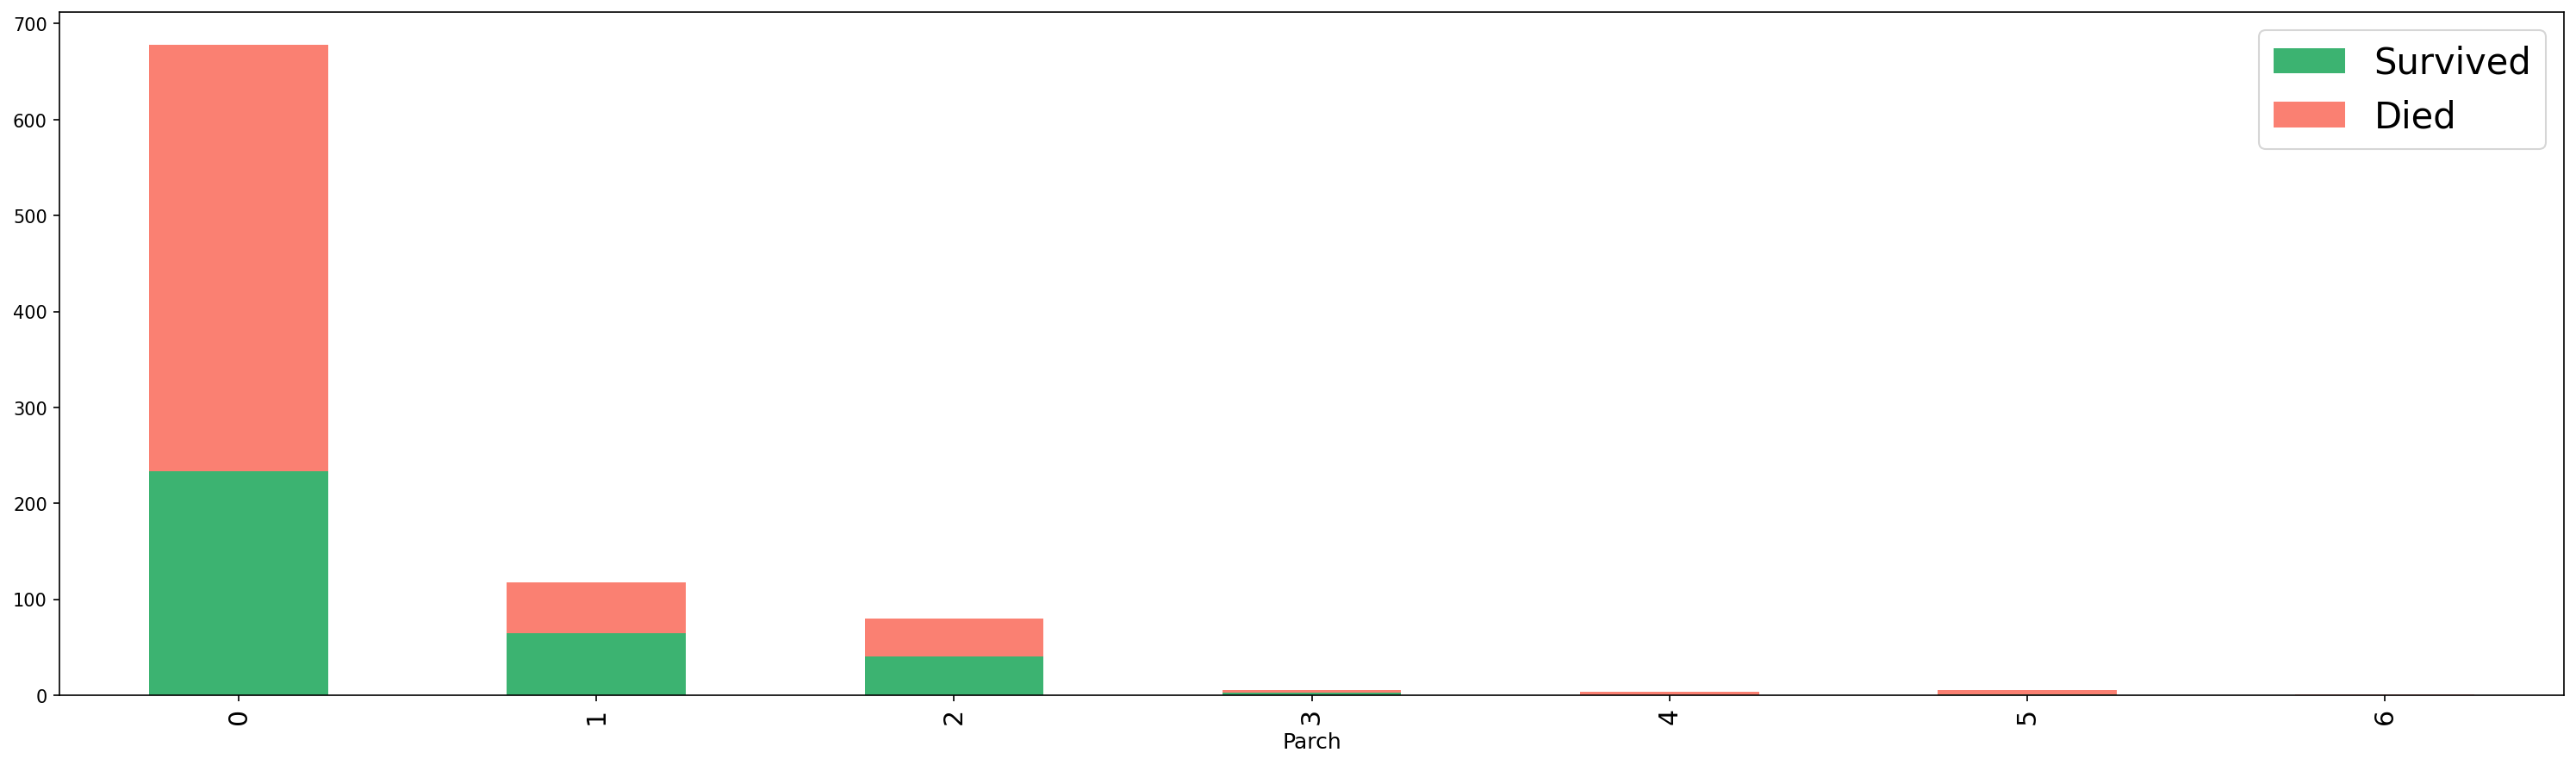

In [12]:
args.raw_train.groupby(['Parch']).agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7),
                                                                   stacked=True, color=['MediumSeaGreen', 'Salmon'])

### Survived and embarked

<AxesSubplot:xlabel='Embarked'>

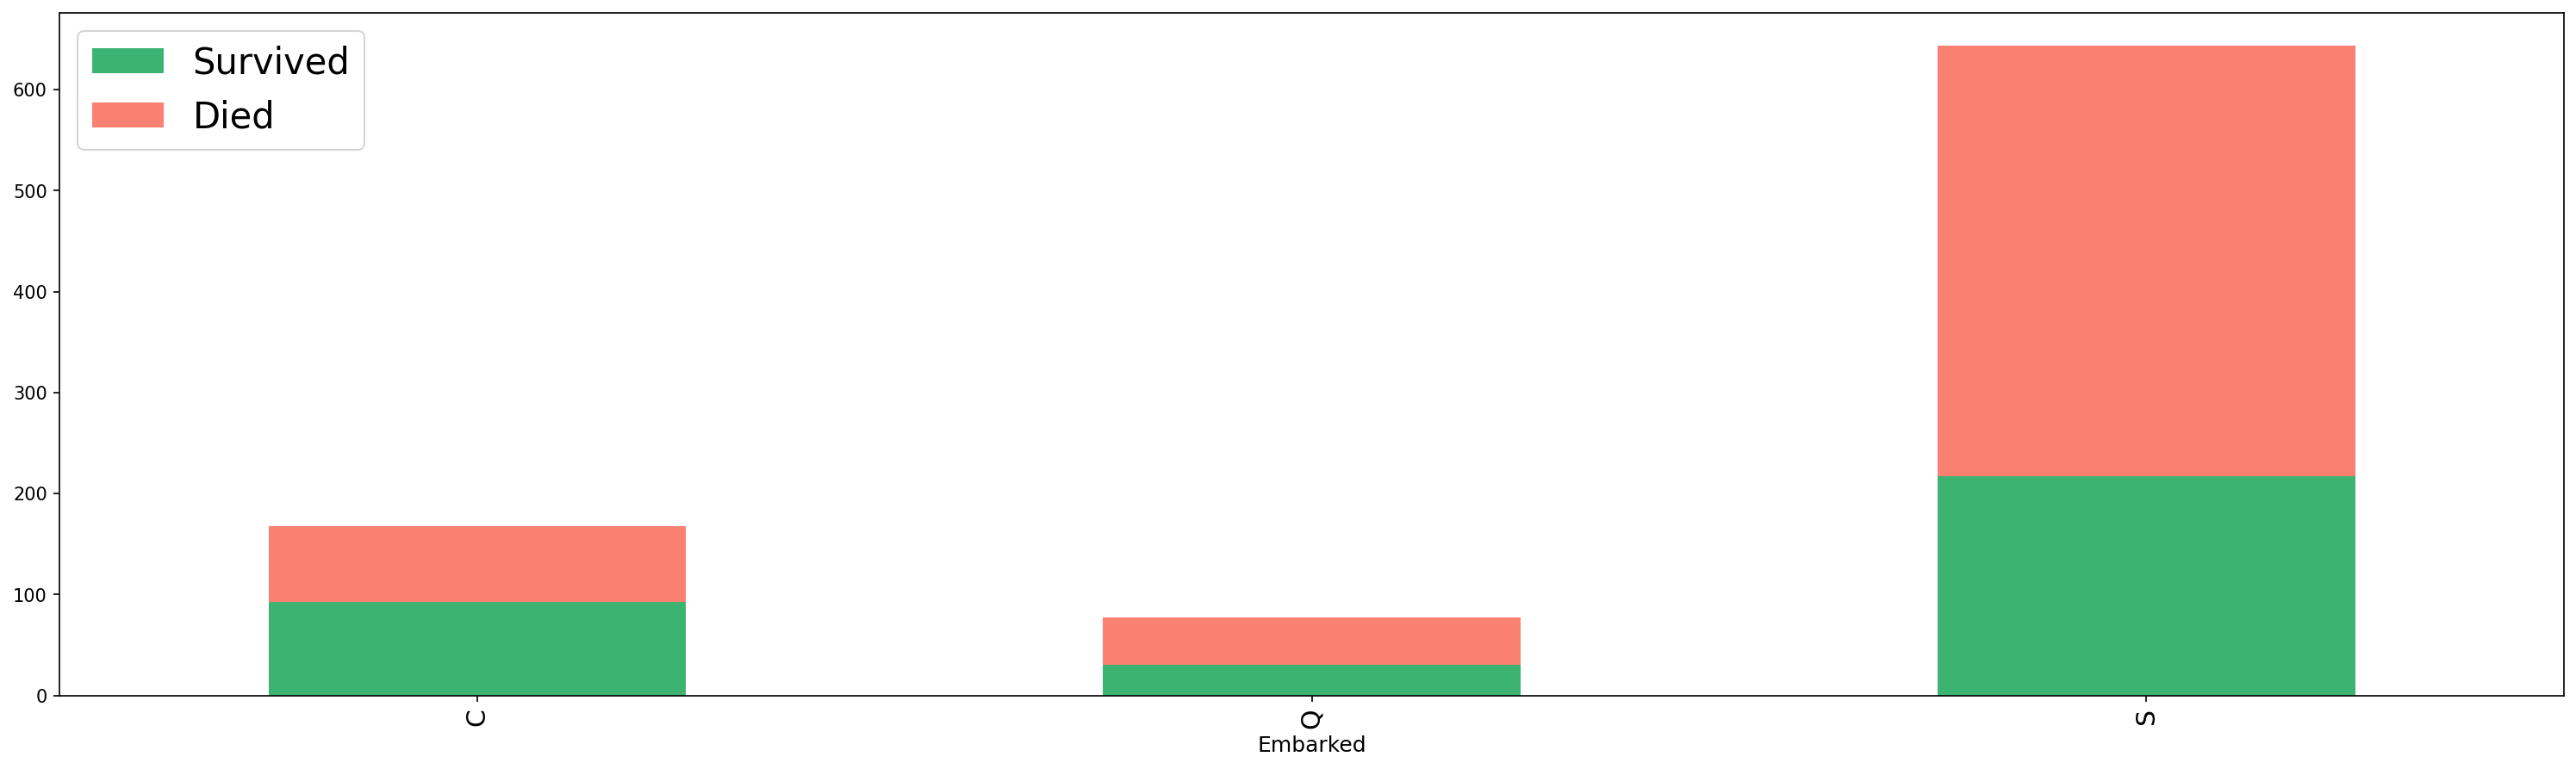

In [13]:
args.raw_train.groupby(['Embarked']).agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7),
                                                                   stacked=True, color=['MediumSeaGreen', 'Salmon'])

In [14]:
args.raw_train.drop('Died', axis=1, inplace=True, errors = 'ignore')

### Unknown data

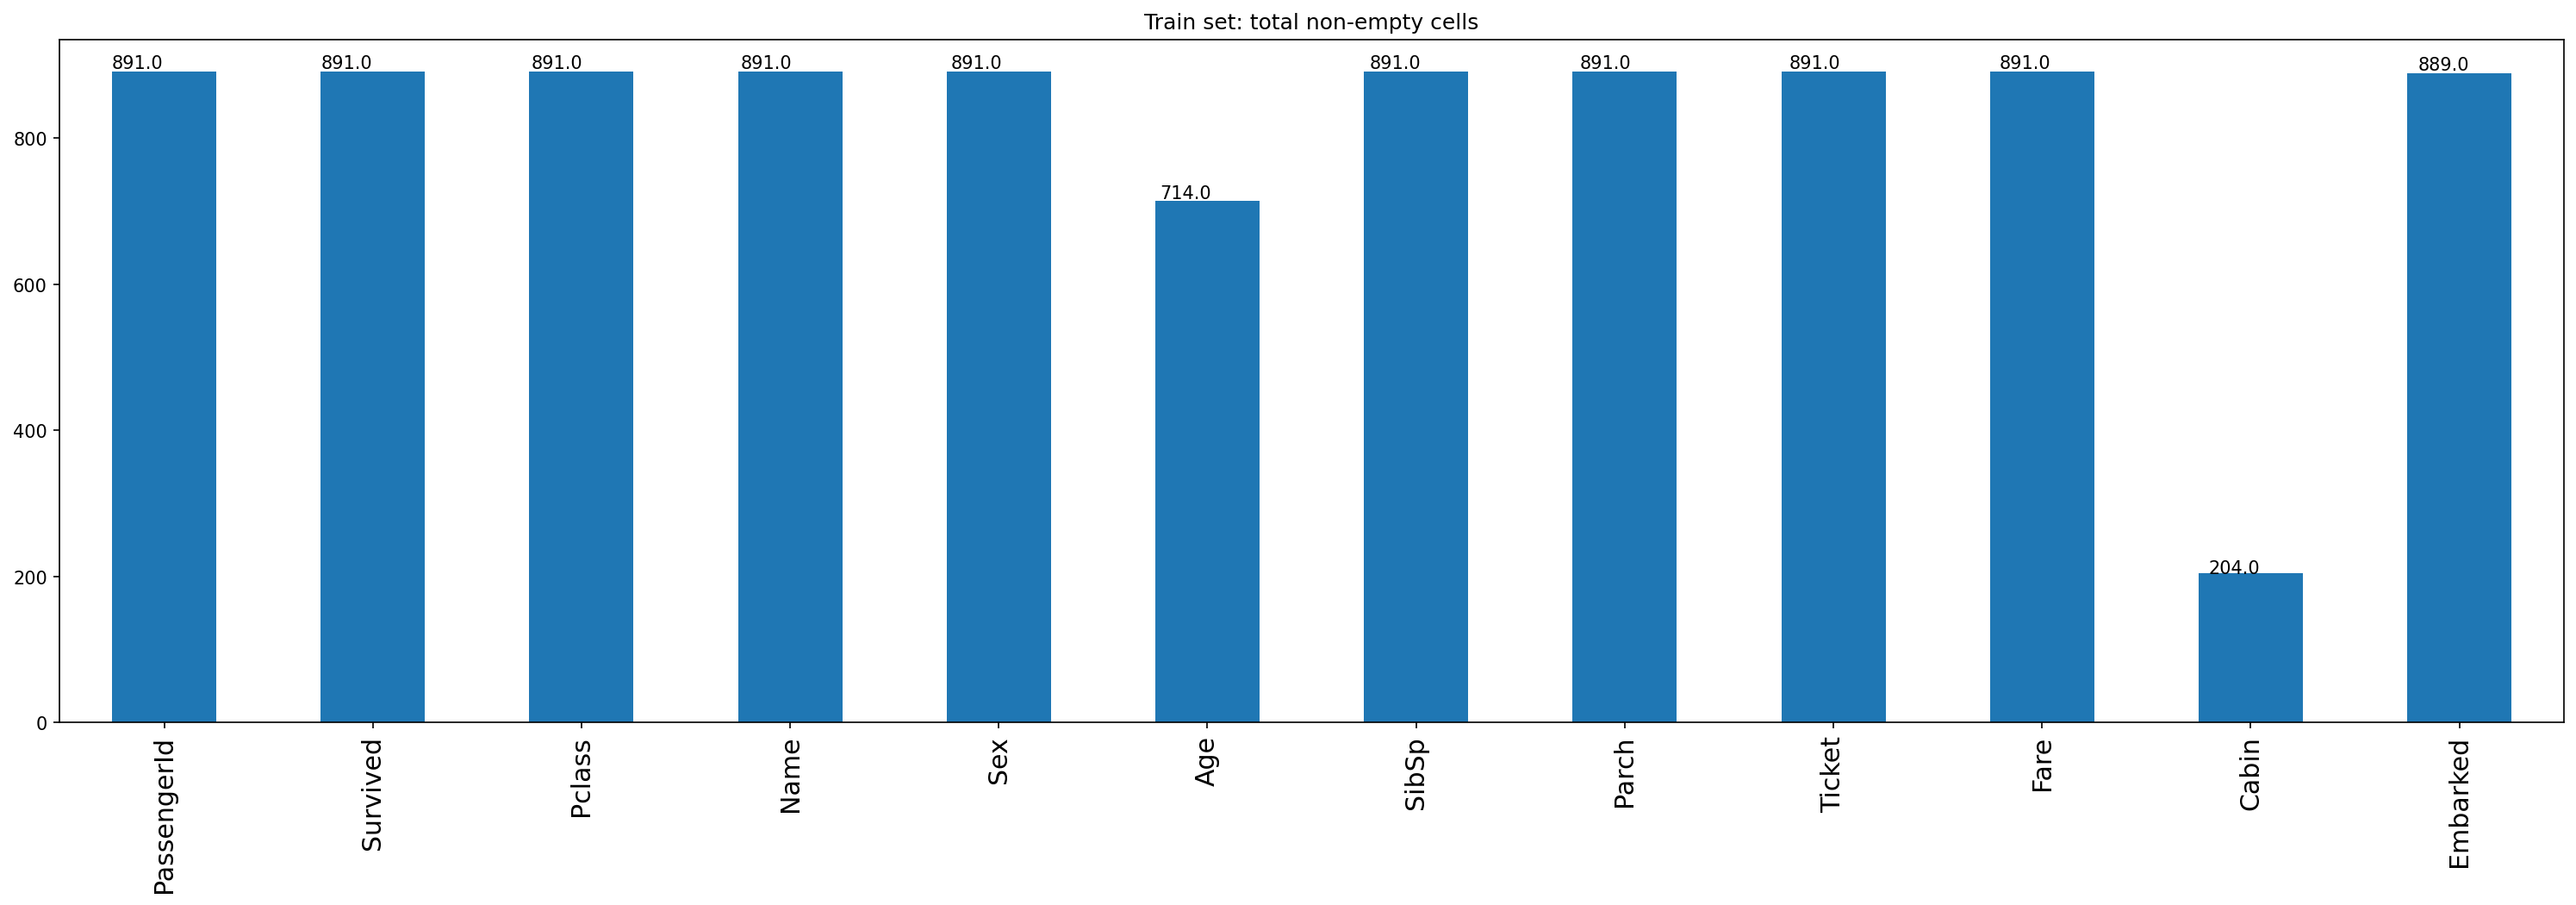

In [15]:
ax = args.raw_train.agg('count').plot(kind='bar', figsize=(25, 7), stacked=True, title='Train set: total non-empty cells')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

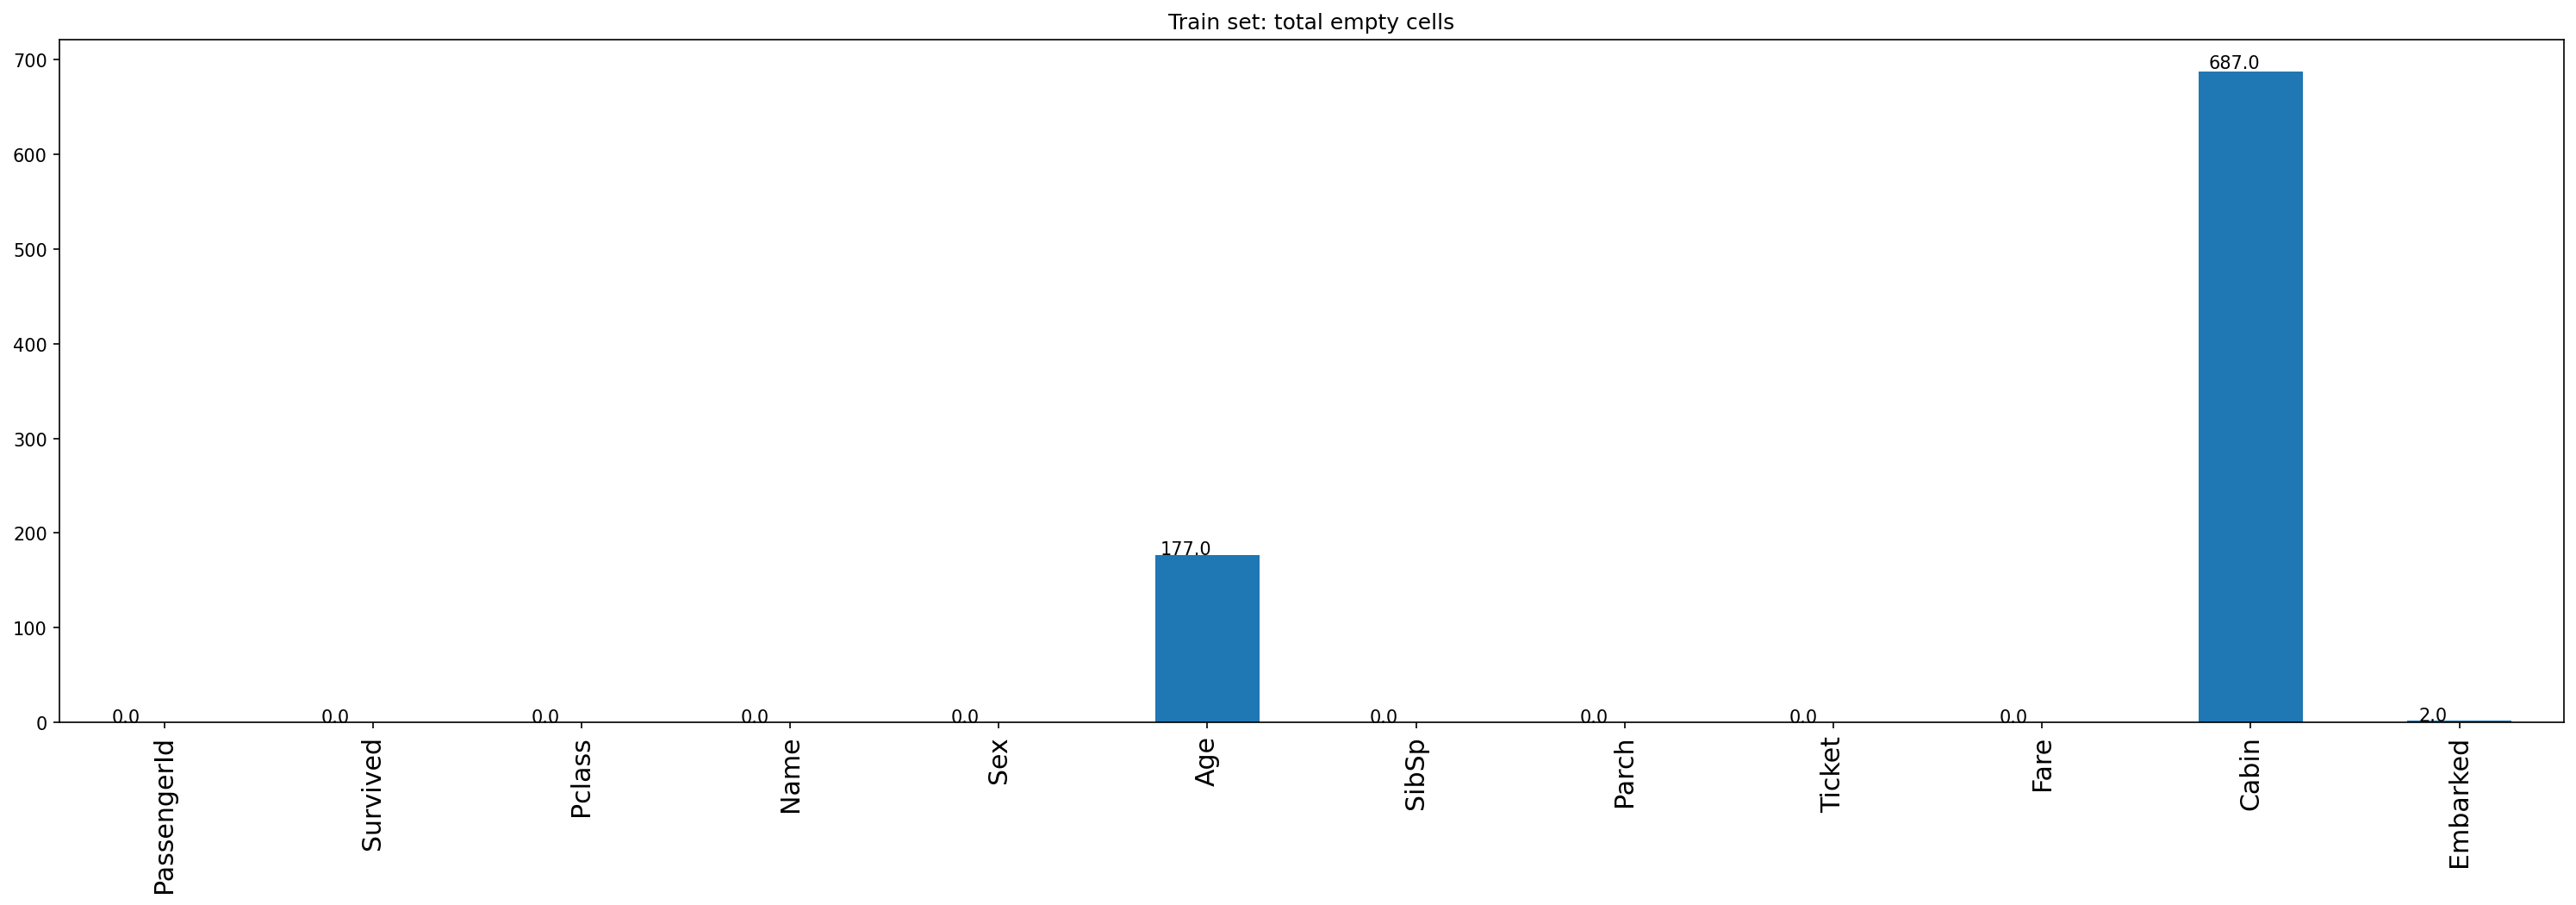

In [16]:
ax = args.raw_train.isna().sum().plot(kind='bar', figsize=(25, 7), stacked=True, title='Train set: total empty cells')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

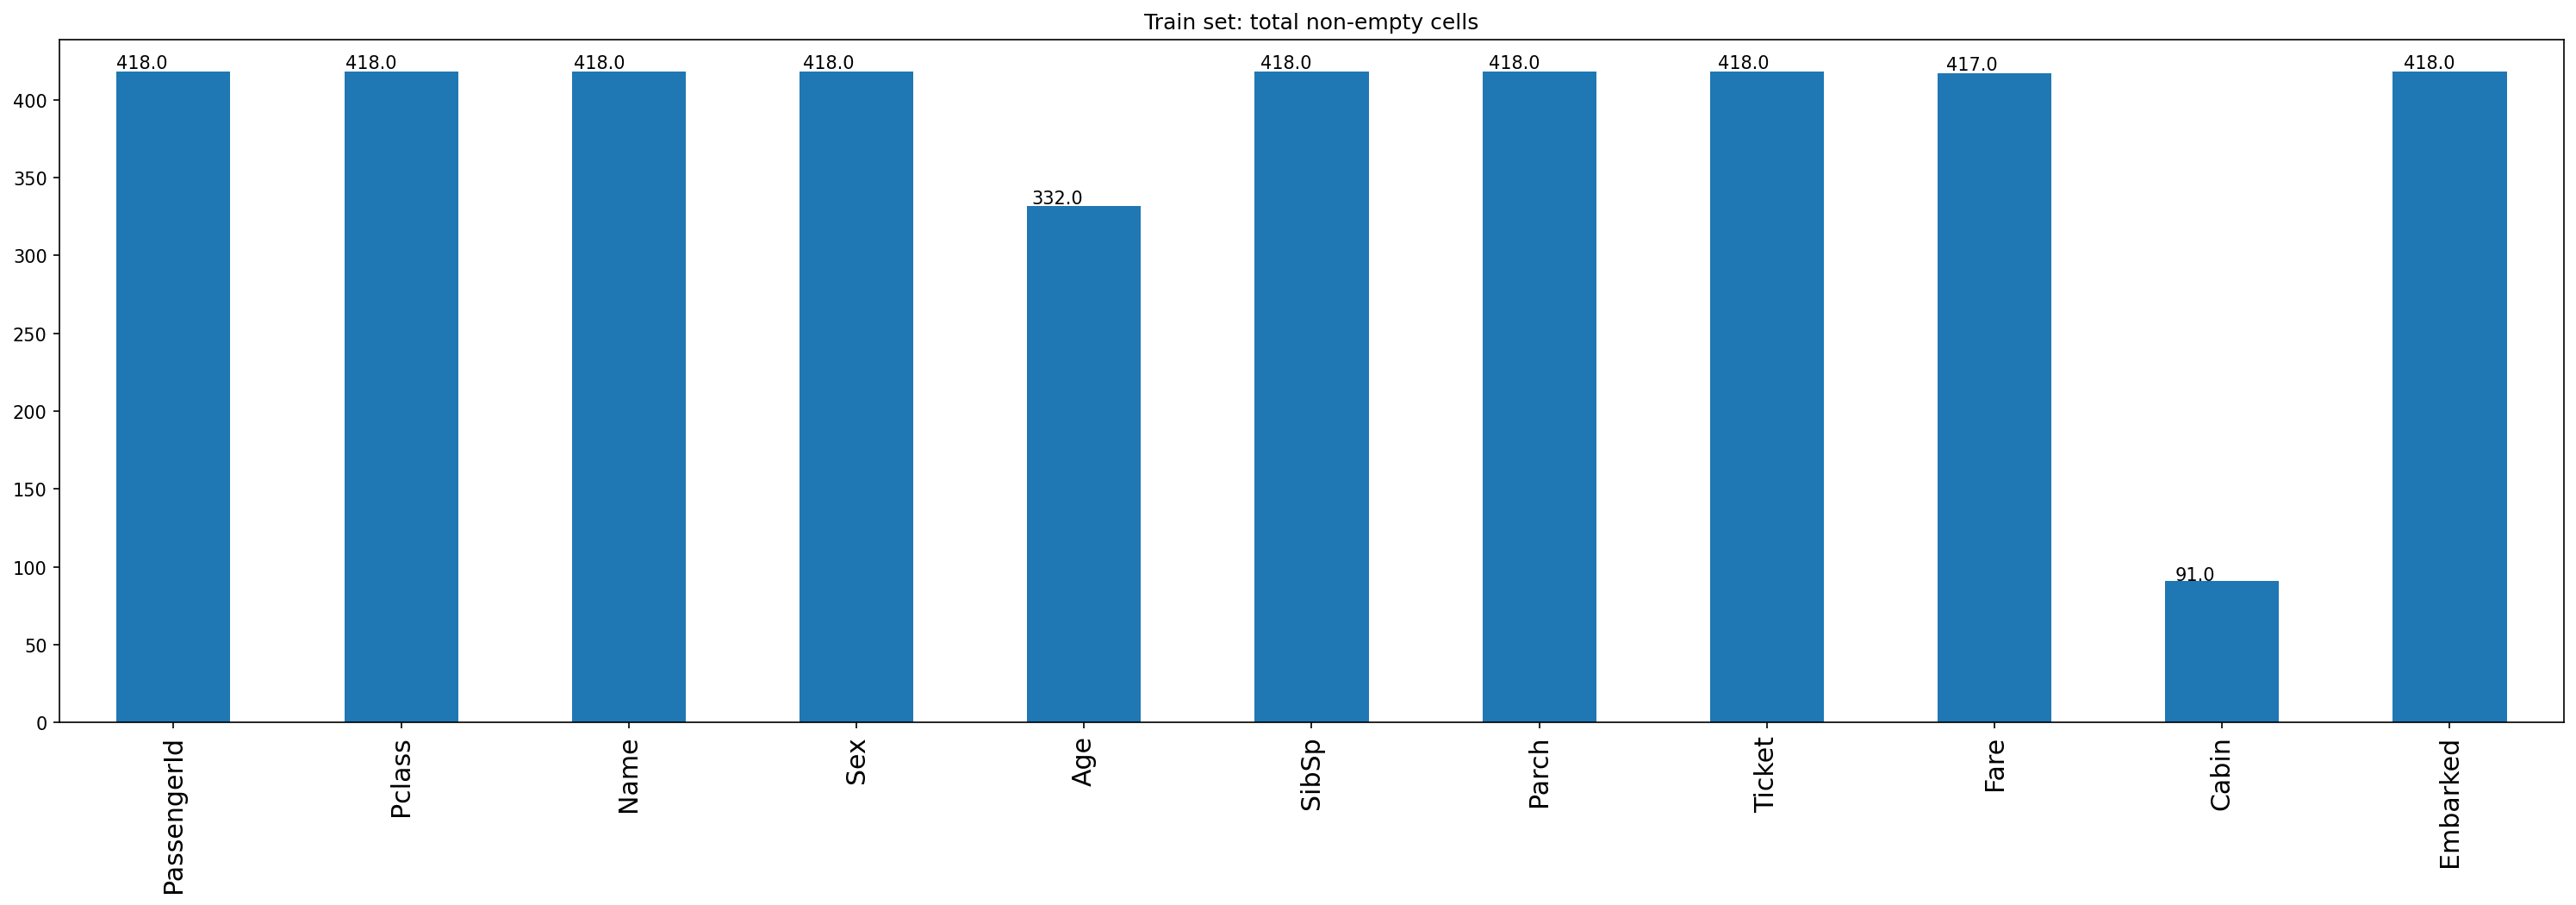

In [17]:
ax = args.raw_test.agg('count').plot(kind='bar', figsize=(25, 7), stacked=True, title='Train set: total non-empty cells')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

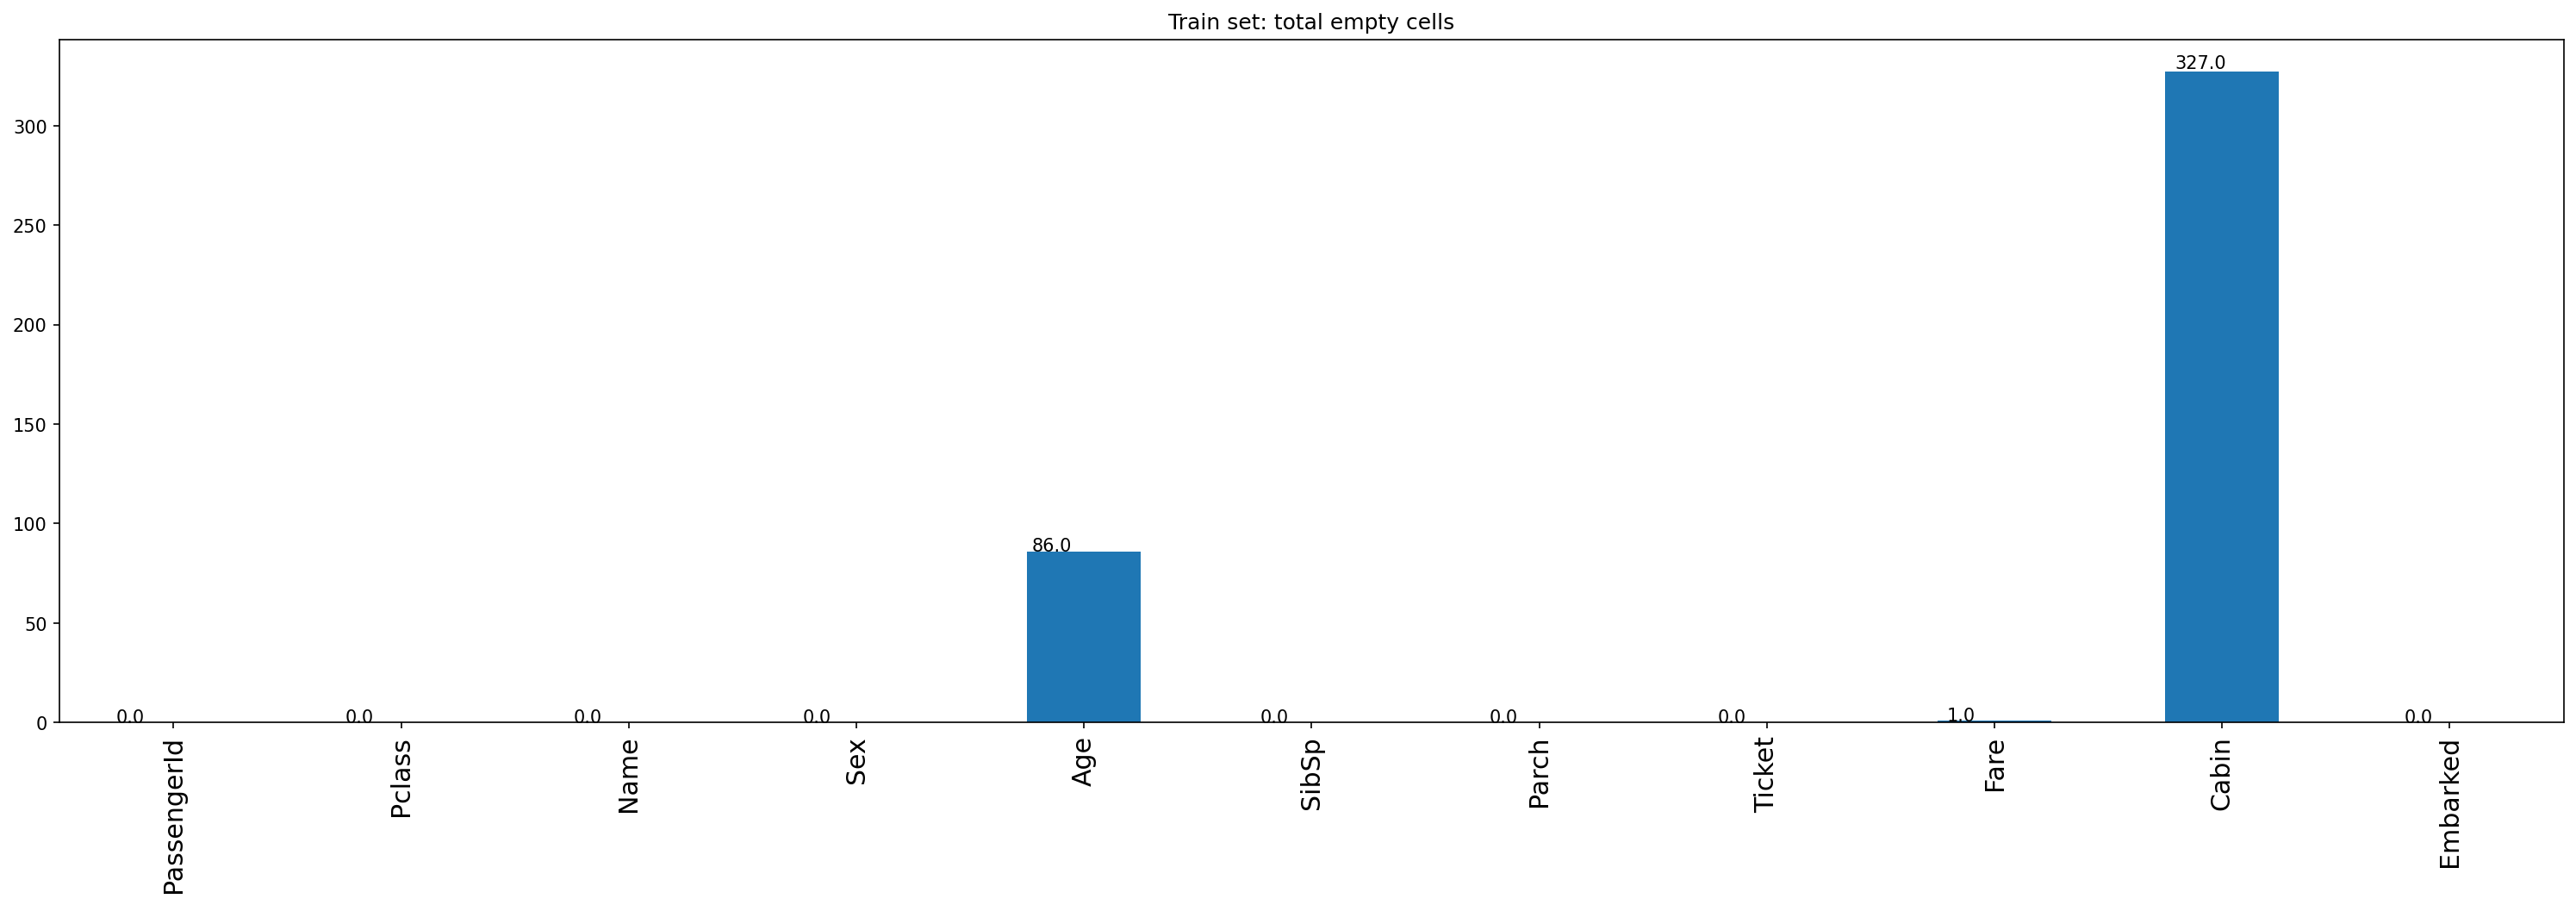

In [18]:
ax = args.raw_test.isna().sum().plot(kind='bar', figsize=(25, 7), stacked=True, title='Train set: total empty cells')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

## 2. Filling missing data

In [19]:
train = args.raw_train.copy()
test = args.raw_test.copy()

#### Cabin

In [20]:
train.drop('Cabin', axis=1, inplace=True, errors = 'ignore')
test.drop('Cabin', axis=1, inplace=True, errors = 'ignore')

#### Embarked

In [21]:
most_frequent_embarked = train['Embarked'].value_counts().index[0]
train['Embarked'] = train['Embarked'].fillna(most_frequent_embarked)
train['Embarked'].isna().sum()

0

#### Age

In [22]:
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())
print(train['Age'].isna().sum())
test['Age'].isna().sum()

0


0

#### Fare

In [23]:
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
test['Fare'].isna().sum()

0

In [24]:
args.train_filled  = train.copy()
args.test_filled  = test.copy()

## 3. Feature engineering

### Combine datasets for the same preprocessing

In [25]:
train = args.train_filled.copy()
test = args.test_filled.copy()
comb = train.append(test, ignore_index=True, sort=False)

### Remove PassengerId, Name, Ticket

In [26]:
comb.drop('PassengerId', axis=1, inplace=True, errors = 'ignore')
comb.drop('Name', axis=1, inplace=True, errors = 'ignore')
comb.drop('Ticket', axis=1, inplace=True, errors = 'ignore')

### Encode sex

In [27]:
comb['Sex'] = comb['Sex'].astype('category').cat.codes

### Encode Embarked

In [28]:
comb['Embarked'] = comb['Embarked'].astype('category').cat.codes

### MinMax Scaling

In [29]:
import pandas as pd
from sklearn import preprocessing

def min_max_scale(comb):
    temp = comb.values #a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    temp = min_max_scaler.fit_transform(temp)
    return pd.DataFrame(temp, columns=comb.columns)
comb = min_max_scale(comb)
args.comb_baseline = comb
args.comb_baseline.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,1.0,1.0,0.273456,0.125,0.0,0.014151,1.0
1,1.0,0.0,0.0,0.473882,0.125,0.0,0.139136,0.0
2,1.0,1.0,0.0,0.323563,0.000,0.0,0.015469,1.0
3,1.0,0.0,0.0,0.436302,0.125,0.0,0.103644,1.0
4,0.0,1.0,1.0,0.436302,0.000,0.0,0.015713,1.0


## 4. Data representation

In [30]:
comb_baseline = args.comb_baseline.copy()

train = comb_baseline[:args.train_border_index]
test = comb_baseline[args.train_border_index:].reset_index(drop=True)

In [31]:
X_baseline = train.drop('Survived', axis=1)
args.X_baseline = X_baseline.copy()
X_baseline.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.273456,0.125,0.0,0.014151,1.0
1,0.0,0.0,0.473882,0.125,0.0,0.139136,0.0
2,1.0,0.0,0.323563,0.000,0.0,0.015469,1.0
3,0.0,0.0,0.436302,0.125,0.0,0.103644,1.0
4,1.0,1.0,0.436302,0.000,0.0,0.015713,1.0


In [32]:
y_baseline = train['Survived']
args.y_baseline = y_baseline.copy()
y_baseline.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [33]:
x_baseline = test.drop('Survived', axis=1)
args.x_baseline = x_baseline.copy()
x_baseline.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.430039,0.000,0.000000,0.015282,0.5
1,1.0,0.0,0.586622,0.125,0.000000,0.013663,1.0
2,0.5,1.0,0.774521,0.000,0.000000,0.018909,0.5
3,1.0,1.0,0.336089,0.000,0.000000,0.016908,1.0
4,1.0,0.0,0.273456,0.125,0.111111,0.023984,1.0


### 4.1 PCA

<AxesSubplot:xlabel='Principal component 1', ylabel='Principal component 2'>

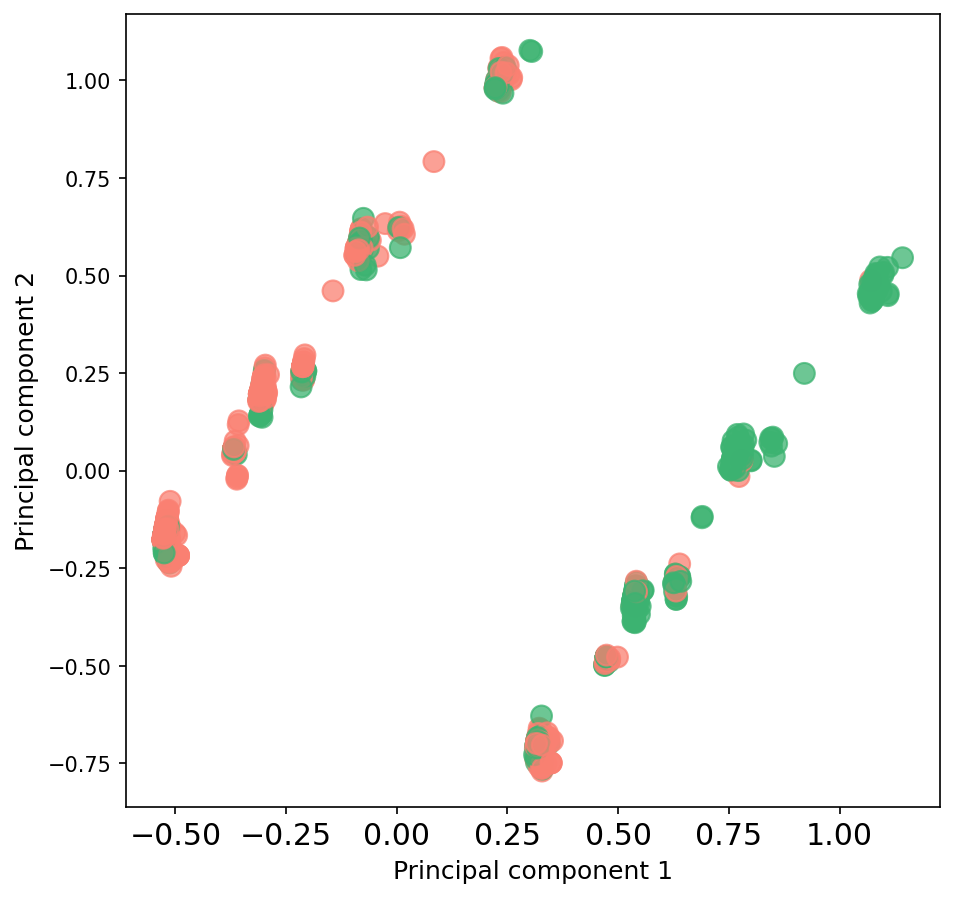

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_full_transformed = pca.fit_transform(X_baseline)
X_train_full_transformed = pd.DataFrame(data=X_train_full_transformed[:, :], 
                                        columns=['Principal component 1', 'Principal component 2'])
y_train_full_color = y_baseline.copy()
y_train_full_color[y_train_full_color==0] = 'Salmon'
y_train_full_color[y_train_full_color==1] = 'MediumSeaGreen'
X_train_full_transformed.plot(kind='scatter', x=X_train_full_transformed.columns[0], 
                              y=X_train_full_transformed.columns[1], figsize=(7, 7), s=100,
                              color=y_train_full_color, alpha=0.75)

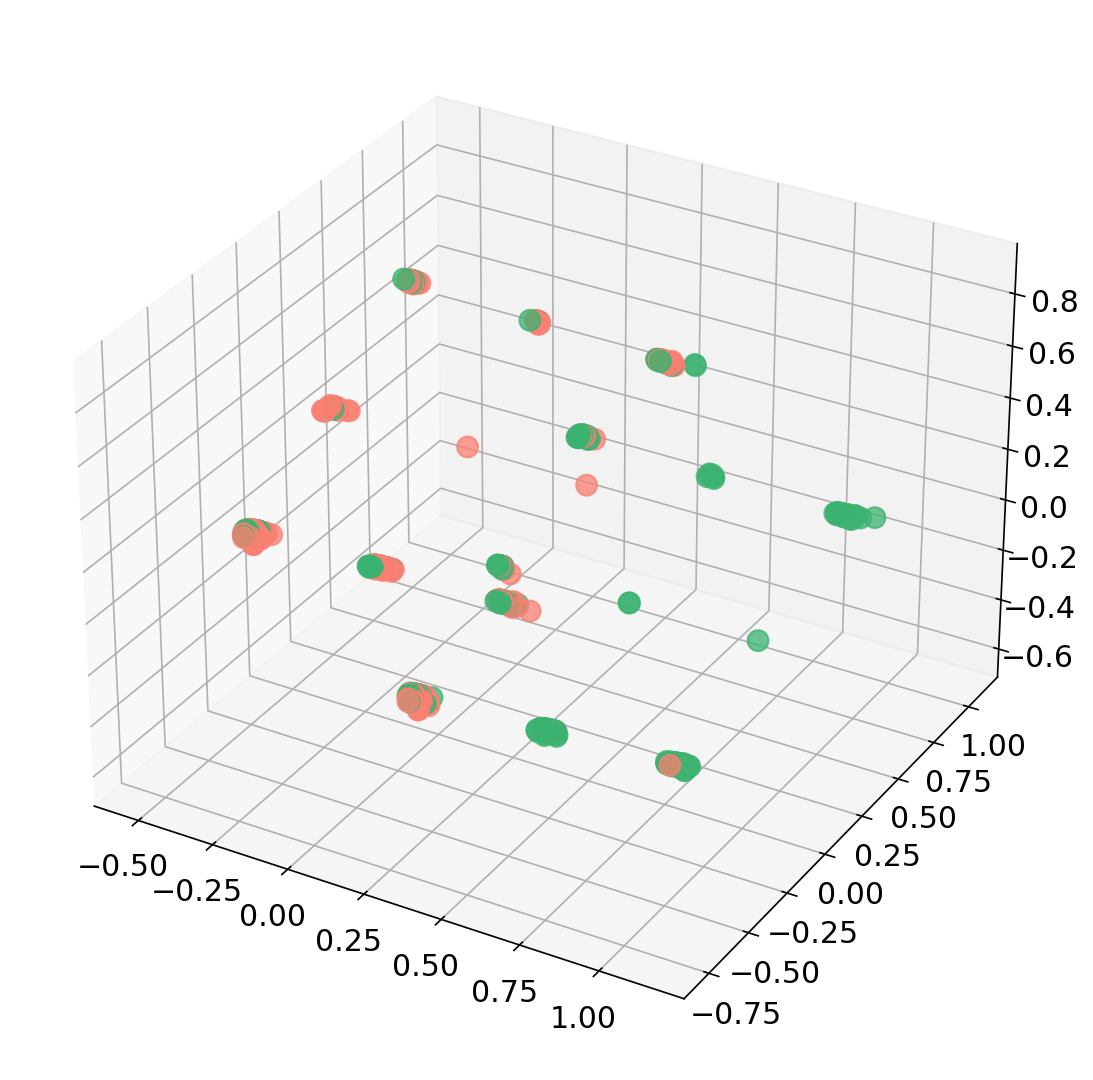

In [35]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  

pca = PCA(n_components=3)
X_train_full_transformed = pca.fit_transform(X_baseline)

y_train_full_color = y_baseline.copy()
y_train_full_color[y_train_full_color==0] = 'Salmon'
y_train_full_color[y_train_full_color==1] = 'MediumSeaGreen'

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig)
ax.scatter(X_train_full_transformed[:, 0], X_train_full_transformed[:, 1], X_train_full_transformed[:, 2], 
           color=y_train_full_color, s=100, alpha=0.75)

### 4.2 LDA

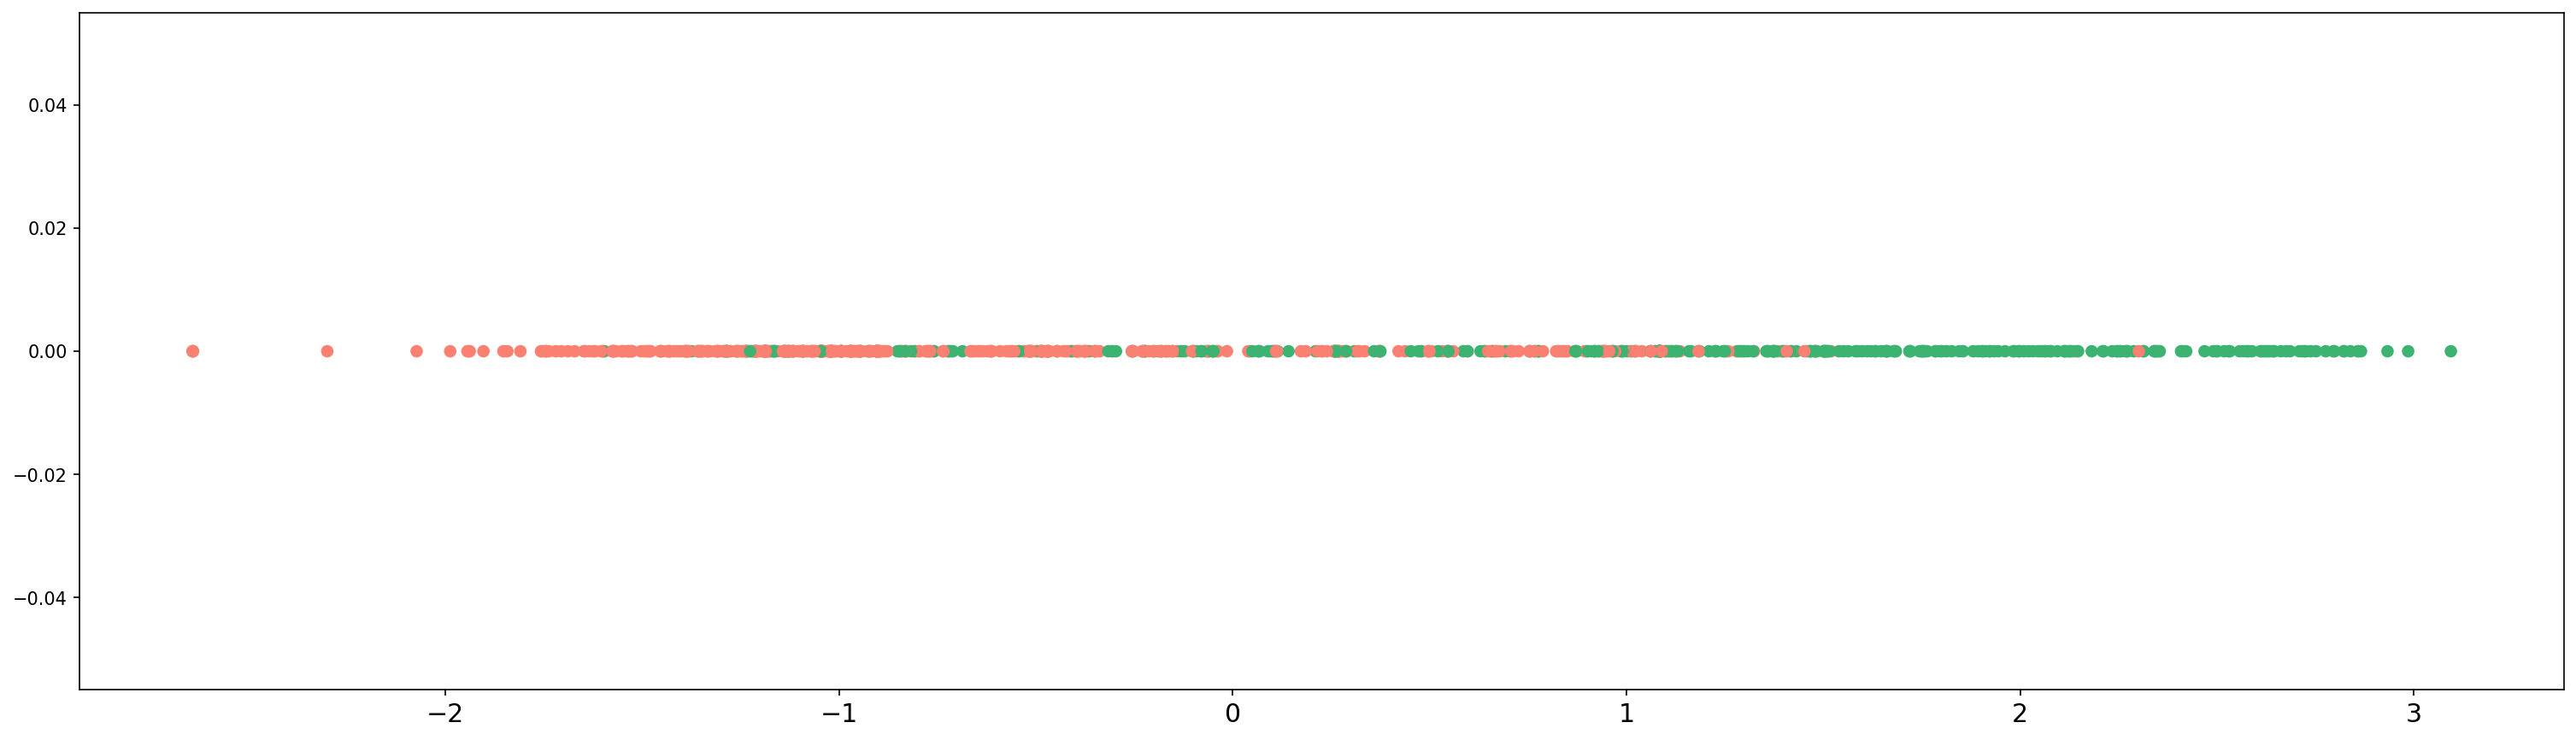

In [36]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
X_train_full_transformed = clf.fit_transform(X_baseline, y_baseline)

y_train_full_color = y_baseline.copy()
y_train_full_color[y_train_full_color==0] = 'Salmon'
y_train_full_color[y_train_full_color==1] = 'MediumSeaGreen'

plt.scatter(X_train_full_transformed, np.zeros(X_train_full_transformed.shape), c=y_train_full_color)

## 5. Training baseline models

### Extra trees

In [37]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

def predict_extra_trees(X, y, x, splits=args.splits):
    skf = StratifiedKFold(n_splits=splits, shuffle=True, random_state=17)
    parameters = {'n_estimators': [2, 5, 10, 25, 50, 100, 250, 500],
                  'max_depth': [1, 2, 5, 7, 10, 15, 20, 50, 100, None], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 10,
                                                                                              15]}
    classifier = ExtraTreesClassifier(random_state=42)
    gcv = GridSearchCV(classifier, parameters, n_jobs=-1, cv=skf, verbose=1)
    gcv.fit(X, y)
    best_params = gcv.best_params_
    print('ExtraTrees best params: ' + repr(gcv.best_params_))
    print('ExtraTrees best CV score: ' + repr(gcv.best_score_))
    
    classifier = ExtraTreesClassifier(**best_params, random_state=42)
    classifier.fit(X, y)
    predictions = classifier.predict(x)
    return predictions.astype(int)

### Random forest

In [38]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

def predict_random_forest(X, y, x, splits=args.splits):
    skf = StratifiedKFold(n_splits=splits, shuffle=True, random_state=17)
    parameters = {'n_estimators': [25, 50, 75, 100, 150, 200, 500], 'max_features': [2, 3, 4, 5, 6, 7],
                  'min_samples_leaf': [1, 3, 5, 7], 'max_depth': [5, 10, 15, 20]}
    rfc = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=False)
    gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
    gcv.fit(X, y)
    best_params = gcv.best_params_
    print('RandomForest best params: ' + repr(gcv.best_params_))
    print('RandomForest best CV score: ' + repr(gcv.best_score_))
    
    classifier = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1, oob_score=False)
    classifier.fit(X, y)
    predictions = classifier.predict(x)
    return predictions.astype(int)

### Multilayer perceptron

In [39]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neural_network import MLPClassifier

def predict_mlp(X, y, x, splits=args.splits):
    skf = StratifiedKFold(n_splits=splits, shuffle=True, random_state=17)
    parameters = {'hidden_layer_sizes': [(512, ), (128, ), (16, ), (512, 64, ), (128, 16), (16, 4)],
                  'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 'max_iter': [50, 100, 200, 400, 750, 1000],
                  'early_stopping': [False, True]}
    classifier = MLPClassifier(random_state=42)
    gcv = GridSearchCV(classifier, parameters, n_jobs=-1, cv=skf, verbose=3)
    gcv.fit(X, y)
    best_params = gcv.best_params_
    print('MLP best params: ' + repr(gcv.best_params_))
    print('MLP best CV score: ' + repr(gcv.best_score_))
    
    classifier = MLPClassifier(**best_params, random_state=42)
    classifier.fit(X, y)
    predictions = classifier.predict(x)
    return predictions.astype(int)

### XGBoost

In [40]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from xgboost import XGBClassifier

def predict_xgboost(X, y, x, splits=args.splits):
    skf = StratifiedKFold(n_splits=splits, shuffle=True, random_state=17)
    parameters = {'n_estimators': [2, 5, 10, 25, 50, 100, 250, 500], 'max_depth': [1, 2, 3, 4, 5, 7, 10, 15, 20, 50],
                  'learning_rate': [0.001, 0.01, 0.1, 0.5, 1], 'booster': ['gbtree', 'gblinear', 'dart']}
    classifier = XGBClassifier()
    gcv = GridSearchCV(classifier, parameters, n_jobs=-1, cv=skf, verbose=1)
    gcv.fit(X, y)
    best_params = gcv.best_params_
    print('XGBoost best params: ' + repr(gcv.best_params_))
    print('XGBoost best CV score: ' + repr(gcv.best_score_))
    
    classifier = XGBClassifier(**best_params)
    classifier.fit(X, y)
    print('XGBoost feature importance: ' + repr(classifier.feature_importances_))
    predictions = classifier.predict(x)
    return predictions.astype(int)

### SVM

In [41]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC

def predict_svm(X, y, x, splits=args.splits):
    skf = StratifiedKFold(n_splits=splits, shuffle=True, random_state=17)
    parameters = {'C': [0.01, 0.1, 1, 10, 50], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
    classifier = SVC(random_state=42, kernel='linear')
    gcv = GridSearchCV(classifier, parameters, n_jobs=-1, cv=skf, verbose=3)
    gcv.fit(X, y)
    best_params = gcv.best_params_
    print('SVM best params: ' + repr(gcv.best_params_))
    print('SVM best CV score: ' + repr(gcv.best_score_))
    
    classifier = SVC(**best_params, random_state=42, kernel='linear')
    classifier.fit(X, y)
    predictions = classifier.predict(x)
    return predictions.astype(int)

### CV baseline models' scores. Best: random forest = 83.5%

|  Model | CV score |
|---|---|
| Extra trees  |  83.39% |
| Random forest | 83.5%|
| MLP | 82.83% |
| XGBoost | 82.82% |
| SVM | 78.58% |

## 6. Baseline solution with the best baseline model with better params

In [42]:
predictions = predict_xgboost(X_baseline, y_baseline, x_baseline)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 842 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done 1592 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2824 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 4352 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 5046 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 5828 tasks      | elapsed: 12.8min


XGBoost best params: {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 5}
XGBoost best CV score: 0.83611198292637
XGBoost feature importance: array([0.11374649, 0.78496486, 0.02022975, 0.04735913, 0.0072989 ,
       0.01971825, 0.00668257], dtype=float32)


[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed: 14.2min finished


In [43]:
def csv_predictions(predictions, filename):
    submission = pd.DataFrame({'PassengerId': args.raw_test['PassengerId'],'Survived': predictions})

    submission.to_csv(filename, index=False)
    print('Saved file: ' + filename)
    
csv_predictions(predictions, 'titanic-approach2-baseline-xgboost.csv')

Saved file: titanic-approach2-baseline-xgboost.csv


### Test set baseline accuracies. Best solution: XGBoost = 78.468%

|  Model | Test set score |
|---|---|
| Extra trees  |  73.21% |
| Random forest | 77.99%|
| MLP | 77.99% |
| XGBoost | 78.468% |
| SVM | 76.55% |

## 7. Thorough feature engineering to improve the model's accuracy

In [44]:
train  = args.train_filled.copy()
test  = args.test_filled.copy()

comb = train.append(test, ignore_index=True, sort=False)
comb.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Transform name to title

In [45]:
title_dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir": "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess": "Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr": "Mr",
    "Mrs": "Mrs",
    "Miss": "Miss",
    "Master": "Master",
    "Lady": "Royalty"
}
# map name to title
comb['Title'] = comb['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip()).map(title_dictionary)

# set a single value to Royalty manually
comb.loc[comb[comb['Title'].isnull()].index[0], 'Title'] = 'Royalty'
comb.drop('Name', axis=1, inplace=True)

### Filling NA ages more carefully taking account of sex, pclass and title

In [46]:
# get back the initial values for Age with nans
train_raw_ages = args.raw_train['Age']
test_raw_ages = args.raw_test['Age']
comb_raw_ages = train_raw_ages.append(test_raw_ages, ignore_index=True)
comb.drop('Age', axis=1, inplace=True, errors='ignore')
comb = pd.concat([comb, comb_raw_ages], axis=1)


def fill_age_median(comb):
    median_ages = comb.groupby(['Sex', 'Pclass', 'Title']).median().reset_index()[['Sex', 'Pclass', 'Title', 'Age']]
    def fill_age_median_row(row):
        if np.isnan(row['Age']):
            return median_ages[(median_ages['Sex'] == row['Sex']) 
                              & (median_ages['Pclass'] == row['Pclass']) 
                              & (median_ages['Title'] == row['Title'])]['Age'].values[0]
        return row['Age']
    comb['Age'] = comb.apply(lambda row: fill_age_median_row(row), axis=1)
    
fill_age_median(comb)

### Remove PassengerId

In [47]:
comb.drop('PassengerId', axis=1, inplace=True, errors = 'ignore')

### Encode sex

In [48]:
comb['Sex'] = comb['Sex'].astype('category').cat.codes

### Encode Embarked

In [49]:
embarked_dummies = pd.get_dummies(comb['Embarked'], prefix='Embarked')
comb = pd.concat([comb, embarked_dummies], axis=1)
comb.drop('Embarked', axis=1, inplace=True)

### Encode Pclass

In [50]:
pclass_dummies = pd.get_dummies(comb['Pclass'], prefix='Pclass')
comb = pd.concat([comb, pclass_dummies], axis=1)
comb.drop('Pclass', axis=1, inplace=True)

### Encode ticket (make one digit?)

In [51]:
import re

def clean_ticket(ticket):
    # replace all special chars
    ticket = re.sub('[^a-zA-Z0-9]', '', ticket)
    if ticket[0].isdigit():
        return 'digit'
    return ticket[0] + ticket[1]

comb['Ticket'] = comb['Ticket'].map(clean_ticket)
ticket_dummies = pd.get_dummies(comb['Ticket'], prefix='Ticket')
comb = pd.concat([comb, ticket_dummies], axis=1)
comb.drop('Ticket', axis=1, inplace=True)

### Encode title

In [52]:
ticket_dummies = pd.get_dummies(comb['Title'], prefix='Title')
comb = pd.concat([comb, ticket_dummies], axis=1)
comb.drop('Title', axis=1, inplace=True)

In [53]:
comb.head()

,Survived,Sex,SibSp,Parch,Fare,Age,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Ticket_A2,Ticket_A4,Ticket_A5,Ticket_AQ,Ticket_AS,Ticket_C1,Ticket_C4,Ticket_C7,Ticket_CA,Ticket_FC,Ticket_Fa,Ticket_LI,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_SC,Ticket_SO,Ticket_SP,Ticket_ST,Ticket_SW,Ticket_WC,Ticket_WE,Ticket_digit,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,0.0,1,1,0,7.2500,22.0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1.0,0,1,0,71.2833,38.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1.0,0,0,0,7.9250,26.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,1.0,0,1,0,53.1000,35.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0.0,1,0,0,8.0500,35.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


## 7.1 Plain siblings and parents encoding 

In [54]:
comb1 = comb.copy()

### Encode siblings (instead of family size)

In [55]:
sibsp_dummies = pd.get_dummies(comb1['SibSp'], prefix='SibSp')
comb1 = pd.concat([comb1, sibsp_dummies], axis=1)
comb1.drop('SibSp', axis=1, inplace=True)

### Encode parents (instead of family size)

In [56]:
parch_dummies = pd.get_dummies(comb1['Parch'], prefix='Parch')
comb1 = pd.concat([comb1, parch_dummies], axis=1)
comb1.drop('Parch', axis=1, inplace=True)

### MinMax scaling

In [57]:
comb1 = min_max_scale(comb1)
comb1.head()

,Survived,Sex,Fare,Age,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Ticket_A2,Ticket_A4,Ticket_A5,Ticket_AQ,Ticket_AS,Ticket_C1,Ticket_C4,Ticket_C7,Ticket_CA,Ticket_FC,Ticket_Fa,Ticket_LI,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_SC,Ticket_SO,Ticket_SP,Ticket_ST,Ticket_SW,Ticket_WC,Ticket_WE,Ticket_digit,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9
0,0.0,1.0,0.014151,0.273456,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.139136,0.473882,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.015469,0.323563,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.103644,0.436302,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.015713,0.436302,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 7.2 Transform siblings and parents to family size

In [58]:
comb2 = comb.copy()

### Transform the number of parents and siblings to family size

In [59]:
def fill_family_size(comb, s_size=0, m_size=4):
    def fill_family_size_row(row):
        if row['SibSp'] + row['Parch'] == s_size:
            return 's'
        elif row['SibSp'] + row['Parch'] <= m_size:
            return 'm'
        else:
            return 'l'
    comb['FamilySize'] = comb.apply(lambda row: fill_family_size_row(row), axis=1)
    
fill_family_size(comb2)

family_size_dummies = pd.get_dummies(comb2['FamilySize'], prefix='FamilySize')
comb2 = pd.concat([comb2, family_size_dummies], axis=1)
comb2.drop('FamilySize', axis=1, inplace=True)
comb2.drop('SibSp', axis=1, inplace=True)
comb2.drop('Parch', axis=1, inplace=True)

### MinMax scaling

In [60]:
comb2 = min_max_scale(comb2)
comb2.head()

,Survived,Sex,Fare,Age,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Ticket_A2,Ticket_A4,Ticket_A5,Ticket_AQ,Ticket_AS,Ticket_C1,Ticket_C4,Ticket_C7,Ticket_CA,Ticket_FC,Ticket_Fa,Ticket_LI,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_SC,Ticket_SO,Ticket_SP,Ticket_ST,Ticket_SW,Ticket_WC,Ticket_WE,Ticket_digit,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,FamilySize_l,FamilySize_m,FamilySize_s
0,0.0,1.0,0.014151,0.273456,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.139136,0.473882,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.015469,0.323563,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.103644,0.436302,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.015713,0.436302,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## 8. Training all the available data representations

In [61]:
train1 = comb1[:args.train_border_index]
X1 = train1.drop('Survived', axis=1)
y1 = train1['Survived']
test1 = comb1[args.train_border_index:].reset_index(drop=True)
x1 = test1.drop('Survived', axis=1)
args.X1 = X1.copy()
args.y1 = y1.copy()
args.x1 = x1.copy()


train2 = comb2[:args.train_border_index]
X2 = train2.drop('Survived', axis=1)
y2 = train2['Survived']
test2 = comb2[args.train_border_index:].reset_index(drop=True)
x2 = test2.drop('Survived', axis=1)
args.X2 = X2.copy()
args.y2 = y2.copy()
args.x2 = x2.copy()

In [62]:
X1.head()

,Sex,Fare,Age,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Ticket_A2,Ticket_A4,Ticket_A5,Ticket_AQ,Ticket_AS,Ticket_C1,Ticket_C4,Ticket_C7,Ticket_CA,Ticket_FC,Ticket_Fa,Ticket_LI,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_SC,Ticket_SO,Ticket_SP,Ticket_ST,Ticket_SW,Ticket_WC,Ticket_WE,Ticket_digit,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9
0,1.0,0.014151,0.273456,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.139136,0.473882,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.015469,0.323563,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.103644,0.436302,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.015713,0.436302,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
X2.head()

,Sex,Fare,Age,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Ticket_A2,Ticket_A4,Ticket_A5,Ticket_AQ,Ticket_AS,Ticket_C1,Ticket_C4,Ticket_C7,Ticket_CA,Ticket_FC,Ticket_Fa,Ticket_LI,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_SC,Ticket_SO,Ticket_SP,Ticket_ST,Ticket_SW,Ticket_WC,Ticket_WE,Ticket_digit,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,FamilySize_l,FamilySize_m,FamilySize_s
0,1.0,0.014151,0.273456,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.139136,0.473882,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.015469,0.323563,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.103644,0.436302,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.015713,0.436302,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### Extra trees

In [64]:
predictions1 = predict_extra_trees(X1, y1, x1)
csv_predictions(predictions1, 'titanic-approach2-extra-trees1.csv')

predictions2 = predict_extra_trees(X2, y2, x2)
csv_predictions(predictions2, 'titanic-approach2-extra-trees2.csv')

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 458 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1258 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1808 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 2458 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 3208 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:  8.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


ExtraTrees best params: {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 25}
ExtraTrees best CV score: 0.8327663046889713
Saved file: titanic-approach2-extra-trees1.csv
Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 498 tasks      | elapsed:   58.3s
[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1298 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1848 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2498 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 3248 tasks      | elapsed:  7.2min


ExtraTrees best params: {'max_depth': 15, 'min_samples_split': 6, 'n_estimators': 25}
ExtraTrees best CV score: 0.8406000878789779
Saved file: titanic-approach2-extra-trees2.csv


[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:  8.1min finished


### Random forest

In [65]:
predictions1 = predict_random_forest(X1, y1, x1)
csv_predictions(predictions1, 'titanic-approach2-random-forest1.csv')

predictions2 = predict_random_forest(X2, y2, x2)
csv_predictions(predictions2, 'titanic-approach2-random-forest2.csv')

Fitting 5 folds for each of 672 candidates, totalling 3360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 3360 out of 3360 | elapsed: 15.3min finished


RandomForest best params: {'max_depth': 20, 'max_features': 7, 'min_samples_leaf': 3, 'n_estimators': 500}
RandomForest best CV score: 0.8305065595380077
Saved file: titanic-approach2-random-forest1.csv
Fitting 5 folds for each of 672 candidates, totalling 3360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 3360 out of 3360 | elapsed: 14.8min finished


RandomForest best params: {'max_depth': 20, 'max_features': 7, 'min_samples_leaf': 3, 'n_estimators': 75}
RandomForest best CV score: 0.83611198292637
Saved file: titanic-approach2-random-forest2.csv


### MLP

In [66]:
predictions1 = predict_mlp(X1, y1, x1)
csv_predictions(predictions1, 'titanic-approach2-mlp1.csv')

predictions2 = predict_mlp(X2, y2, x2)
csv_predictions(predictions2, 'titanic-approach2-mlp2.csv') # 79.904

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 98.2min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 98.6min finished


MLP best params: {'alpha': 1, 'early_stopping': False, 'hidden_layer_sizes': (16, 4), 'max_iter': 400}
MLP best CV score: 0.8394764923733602
Saved file: titanic-approach2-mlp1.csv
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 156.0min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 160.7min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 165.9min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 688.0min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 688.5min finished
/Users/glaizier/github/titanic-prediction/.venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP best params: {'alpha': 0.01, 'early_stopping': False, 'hidden_layer_sizes': (16,), 'max_iter': 400}
MLP best CV score: 0.8383591739376058
Saved file: titanic-approach2-mlp2.csv


/Users/glaizier/github/titanic-prediction/.venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### XGBoost

In [67]:
predictions1 = predict_xgboost(X1, y1, x1)
csv_predictions(predictions1, 'titanic-approach2-xgboost1.csv')

predictions2 = predict_xgboost(X2, y2, x2)
csv_predictions(predictions2, 'titanic-approach2-xgboost2.csv')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 502 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1302 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1852 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 2940 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 4264 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 5114 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed: 23.8min finished


XGBoost best params: {'booster': 'gbtree', 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 250}
XGBoost best CV score: 0.8361245370660976
XGBoost feature importance: array([0.        , 0.05444621, 0.01922711, 0.        , 0.        ,
       0.        , 0.04263884, 0.        , 0.14988944, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01047092, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.65107536,
       0.        , 0.07225204, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ], dtype=float32)
Saved file: titanic-approach2-xgboost1.csv
Fitting 5 folds for each of 1200 candidates, totalling

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 872 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1322 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1872 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 3016 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 4300 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 5150 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed: 21.1min finished


XGBoost best params: {'booster': 'gbtree', 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 250}
XGBoost best CV score: 0.8361245370660976
XGBoost feature importance: array([0.        , 0.05444621, 0.01922711, 0.        , 0.        ,
       0.        , 0.04263884, 0.        , 0.14988944, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01047092, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.65107536,
       0.        , 0.07225204, 0.        , 0.        , 0.        ,
       0.        ], dtype=float32)
Saved file: titanic-approach2-xgboost2.csv


### SVM

In [68]:
predictions1 = predict_svm(X1, y1, x1)
csv_predictions(predictions1, 'titanic-approach2-svm1.csv')

predictions2 = predict_svm(X2, y2, x2)
csv_predictions(predictions2, 'titanic-approach2-svm2.csv')

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 143 out of 150 | elapsed:    4.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


SVM best params: {'C': 10, 'gamma': 0.0001}
SVM best CV score: 0.8327600276191074
Saved file: titanic-approach2-svm1.csv
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s


SVM best params: {'C': 10, 'gamma': 0.0001}
SVM best CV score: 0.8260310087251271
Saved file: titanic-approach2-svm2.csv


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    3.3s finished


### CV models' scores
#### With Parch and SibSp

|  Model | CV score |
|---|---|
| Extra trees  |  82.716% |
| Random forest | 82.828%|
| MLP | 83.053% |
| XGBoost | 83.052% |
| SVM | 82.941% |

#### With family_size

|  Model | CV score |
|---|---|
| Extra trees  |  83.277% |
| Random forest | 83.277%|
| MLP | 83.053% |
| XGBoost | 83.277% |
| SVM | 82.492% |

### Test set accuracies 
These results are a matter of luck since initial model params and K-Fold split might vary from time to time. In the 3rd column the params with which the test score was reached are present. 

#### With Parch and SibSp

|  Model | Test set score | Params |
|---|---|---|
| Extra trees  |  77.511% |
| Random forest | 79.425%| {'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 1, 'n_estimators': 500} |
| MLP | 77.511% |
| XGBoost | 77.990% |
| SVM | 78.947% |

#### With family_size
|  Model | Test set score | Params |
|---|---|  --- |
| Extra trees  |  80.382% | {'max_depth': 7, 'min_samples_split': 15, 'n_estimators': 5} |
| Random forest | 78.947%|
| MLP | 79.904% | {'alpha': 0.1, 'early_stopping': False, 'hidden_layer_sizes': (16,), 'max_iter': 400} / {'alpha': 0.1, 'early_stopping': False, 'hidden_layer_sizes': (128, 16), 'max_iter': 50} |
| XGBoost | 76.555% |
| SVM | 77.990% |

## 9. Training the best models with the best params

In [69]:
csv_name1 = 'titanic-approach2-extra-trees2-best-params.csv'
csv_name2 = 'titanic-approach2-extra-trees2-best-params.csv'
csv_name3 = 'titanic-approach2-random-forest1-best-params.csv'

In [70]:
classifier = ExtraTreesClassifier(**{'max_depth': 7, 'min_samples_split': 15, 'n_estimators': 5}, random_state=42)
classifier.fit(X2, y2)
predictions = classifier.predict(x2)
csv_predictions(predictions.astype(int), csv_name1)

Saved file: titanic-approach2-extra-trees2-best-params.csv


In [71]:
classifier = RandomForestClassifier(**{'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 1, 'n_estimators': 500}, random_state=42, n_jobs=-1, oob_score=False)
classifier.fit(X1, y1)
predictions = classifier.predict(x1)
csv_predictions(predictions.astype(int), csv_name2)

Saved file: titanic-approach2-extra-trees2-best-params.csv


In [72]:
classifier = MLPClassifier(**{'alpha': 0.1, 'early_stopping': False, 'hidden_layer_sizes': (128, 16), 'max_iter': 50}, random_state=42)
classifier.fit(X2, y2)
predictions = classifier.predict(x2)
csv_predictions(predictions.astype(int), csv_name3)

Saved file: titanic-approach2-random-forest1-best-params.csv


/Users/glaizier/github/titanic-prediction/.venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## 10. Bagging the best models

In [73]:
predictions_extra_trees2 = pd.read_csv(csv_name1)
predictions_mlp2 = pd.read_csv(csv_name2)
predictions_random_forest1 = pd.read_csv(csv_name3)

def calc_models_correlation(predictions):
    np_predictions = [prediction['Survived'].values for prediction in predictions]
    res = pd.DataFrame(0, index=np.arange(predictions[0]['Survived'].size), columns=['Survived'])
    for prediction in predictions:
        res['Survived'] = res['Survived'] + prediction['Survived']
    res['Survived'] = res['Survived'].map(lambda val: 1 if (val == 0 or val == len(predictions)) else 0)
    res['Survived'].sum()
    return res['Survived'].sum() / res['Survived'].size
print(calc_models_correlation([predictions_extra_trees2, predictions_mlp2])) 
print(calc_models_correlation([predictions_extra_trees2, predictions_random_forest1]))
print(calc_models_correlation([predictions_mlp2, predictions_random_forest1]))

1.0
0.9210526315789473
0.9210526315789473


In [74]:
def predict_bag_models(predictions):
    res = pd.DataFrame(0, index=np.arange(predictions[0]['Survived'].size), columns=['Survived'])
    for prediction in predictions:
        res['Survived'] = res['Survived'] + prediction['Survived']
    res['Survived'] = res['Survived'].map(lambda val: 1 if val / len(predictions) > 0.5 else 0)
    return res['Survived'].values
    
predictions_bag_models = predict_bag_models([predictions_extra_trees2, 
                                             predictions_mlp2,
                                             predictions_random_forest1])
csv_predictions(predictions_bag_models, 'titanic-approach2-bag-models.csv')

Saved file: titanic-approach2-bag-models.csv


### Test set accuracies with the usage of bagging of the best models
These results are a matter of luck since initial model params and K-Fold split might vary from time to time.

|  Model | Test set score |
|---|---|
| Extra trees2 + MLP2 + Random Forest1 | 80.382% | 
| Extra trees2 + MLP2 + Baseline + Random Forest2 > 0.5 | 80.382% |
| Extra trees2 + MLP2 + Baseline + Random Forest2 + SVM | 78.468% |
| Extra trees2 + MLP2 >= 0.5 | 80.382% |

## Conclusion

1. Dummies encoding usually works better
2. MinMax scaling is not always needed
3. The decision about whether it's better to use categories or raw numbers cannot be done beforehand and experiments are needed
4. Occasionally, bagging of models might be beneficial
5. In most cases, experiments are needed to say whether something works or not
6. The better the data, the better the model